# Plot-2: main89 and DP8 Kinematics X-section
Compare the kinematic properties of main89 with DP8 when y-axis with cross-section unit

## 1. Import Packages

In [1]:
# The Python Standard Library
import os
import sys
import time
import datetime
import glob
import multiprocessing as mp

# The Third-Party Library
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm
import prettytable
import uproot
import pyjet
import importlib

# My Packages
import myhep.particle_information_v2 as mypiv2
import myhep.analytical_function_v2 as myafv2
import myhep.particleinfo_v1 as mypiv1
import myhep.particlefun_v1 as myafv1

# increase figure showing resolution
%config InlineBackend.figure_format = 'retina'

## 2. Load the Data

### 2-1. main89

In [2]:
df_xdxdx_23_2 = pd.read_csv('analysis-1_ckkwl2/ana1_rinv3_Lambdad5_1_S23.csv')
df_xdxdx_71_2 = pd.read_csv('analysis-1_ckkwl2/ana1_rinv3_Lambdad5_1_S71.csv')
analyzed_data_2 = np.load('analysis-1_ckkwl2/ana1_rinv3_Lambdad5_1.npz')
analyzed_data_Weight_2 = np.load('analysis-1_ckkwl2/ana1_rinv3_Lambdad5_1_Weight.npz', allow_pickle=True)

df_xdxdx_23_3 = pd.read_csv('analysis-1_ckkwl3/ana1_rinv3_Lambdad5_1_S23.csv')
df_xdxdx_71_3 = pd.read_csv('analysis-1_ckkwl3/ana1_rinv3_Lambdad5_1_S71.csv')
analyzed_data_3 = np.load('analysis-1_ckkwl3/ana1_rinv3_Lambdad5_1.npz')
analyzed_data_Weight_3 = np.load('analysis-1_ckkwl3/ana1_rinv3_Lambdad5_1_Weight.npz', allow_pickle=True)

df_xdxdx_23_4 = pd.read_csv('analysis-1_ckkwl4/ana1_rinv3_Lambdad5_1_S23.csv')
df_xdxdx_71_4 = pd.read_csv('analysis-1_ckkwl4/ana1_rinv3_Lambdad5_1_S71.csv')
analyzed_data_4 = np.load('analysis-1_ckkwl4/ana1_rinv3_Lambdad5_1.npz')
analyzed_data_Weight_4 = np.load('analysis-1_ckkwl4/ana1_rinv3_Lambdad5_1_Weight.npz', allow_pickle=True)

df_xdxdx_23_8 = pd.read_csv('analysis-1_ckkwl8/ana1_rinv3_Lambdad5_1_S23.csv')
df_xdxdx_71_8 = pd.read_csv('analysis-1_ckkwl8/ana1_rinv3_Lambdad5_1_S71.csv')
analyzed_data_8 = np.load('analysis-1_ckkwl8/ana1_rinv3_Lambdad5_1.npz')
analyzed_data_Weight_8 = np.load('analysis-1_ckkwl8/ana1_rinv3_Lambdad5_1_Weight.npz', allow_pickle=True)

In [3]:
print(analyzed_data_4.files)
print(analyzed_data_Weight_4.files)

['truth_jet', 'truth_jet_filterDM', 'truth_MET', 'detector_jet']
['weight']


In [4]:
M_xdxdx_23_2 = df_xdxdx_23_2['M_xdxdx'].to_numpy()
M_xdxdx_23_3 = df_xdxdx_23_3['M_xdxdx'].to_numpy()
M_xdxdx_23_4 = df_xdxdx_23_4['M_xdxdx'].to_numpy()
M_xdxdx_23_8 = df_xdxdx_23_8['M_xdxdx'].to_numpy()

In [5]:
truth_jet_2 = analyzed_data_2['truth_jet']
truth_jet_filterDM_2 = analyzed_data_2['truth_jet_filterDM']
truth_MET_2 = analyzed_data_2['truth_MET']
# detector_jet = analyzed_data['detector_jet']
weight_2 = analyzed_data_Weight_2['weight']*10000*(10**9)
# s=selected events, t=truth, j=jet,
# f=filter, DM=dark matter, d=detector
s_t_j_2 = truth_jet_2[3].astype(np.int64)
s_t_j_fDM_2 = truth_jet_filterDM_2[3].astype(np.int64)
s_t_MET_2 = truth_MET_2[4].astype(np.int64)
# s_d_j = detector_jet[3].astype(np.int64)

truth_jet_3 = analyzed_data_3['truth_jet']
truth_jet_filterDM_3 = analyzed_data_3['truth_jet_filterDM']
truth_MET_3 = analyzed_data_3['truth_MET']
weight_3 = analyzed_data_Weight_3['weight']*10000*(10**9)
# s=selected events, t=truth, j=jet,
# f=filter, DM=dark matter, d=detector
s_t_j_3 = truth_jet_3[3].astype(np.int64)
s_t_j_fDM_3 = truth_jet_filterDM_3[3].astype(np.int64)
s_t_MET_3 = truth_MET_3[4].astype(np.int64)

truth_jet_4 = analyzed_data_4['truth_jet']
truth_jet_filterDM_4 = analyzed_data_4['truth_jet_filterDM']
truth_MET_4 = analyzed_data_4['truth_MET']
weight_4 = analyzed_data_Weight_4['weight']*10000*(10**9)
# s=selected events, t=truth, j=jet,
# f=filter, DM=dark matter, d=detector
s_t_j_4 = truth_jet_4[3].astype(np.int64)
s_t_j_fDM_4 = truth_jet_filterDM_4[3].astype(np.int64)
s_t_MET_4 = truth_MET_4[4].astype(np.int64)

truth_jet_8 = analyzed_data_8['truth_jet']
truth_jet_filterDM_8 = analyzed_data_8['truth_jet_filterDM']
truth_MET_8 = analyzed_data_8['truth_MET']
weight_8 = analyzed_data_Weight_8['weight']*10000*(10**9)
# s=selected events, t=truth, j=jet,
# f=filter, DM=dark matter, d=detector
s_t_j_8 = truth_jet_8[3].astype(np.int64)
s_t_j_fDM_8 = truth_jet_filterDM_8[3].astype(np.int64)
s_t_MET_8 = truth_MET_8[4].astype(np.int64)

### 2-2. DP8
8X = DP8_X, where X = 2, 3, 4, and 8

In [6]:
df_xdxdx_23_82 = pd.read_csv('analysis-1_ckkwl82/_ck8_rinv3_Lambdad5_1_S23.csv')
df_xdxdx_71_82 = pd.read_csv('analysis-1_ckkwl82/_ck8_rinv3_Lambdad5_1_S71.csv')
analyzed_data_82 = np.load('analysis-1_ckkwl82/_ck8_rinv3_Lambdad5_1.npz')
analyzed_data_Weight_82 = np.load('analysis-1_ckkwl82/_ck8_rinv3_Lambdad5_1_Weight.npz', allow_pickle=True)

df_xdxdx_23_83 = pd.read_csv('analysis-1_ckkwl83/_ck8_rinv3_Lambdad5_1_S23.csv')
df_xdxdx_71_83 = pd.read_csv('analysis-1_ckkwl83/_ck8_rinv3_Lambdad5_1_S71.csv')
analyzed_data_83 = np.load('analysis-1_ckkwl83/_ck8_rinv3_Lambdad5_1.npz')
analyzed_data_Weight_83 = np.load('analysis-1_ckkwl83/_ck8_rinv3_Lambdad5_1_Weight.npz', allow_pickle=True)

df_xdxdx_23_84 = pd.read_csv('analysis-1_ckkwl84/_ck8_rinv3_Lambdad5_1_S23.csv')
df_xdxdx_71_84 = pd.read_csv('analysis-1_ckkwl84/_ck8_rinv3_Lambdad5_1_S71.csv')
analyzed_data_84 = np.load('analysis-1_ckkwl84/_ck8_rinv3_Lambdad5_1.npz')
analyzed_data_Weight_84 = np.load('analysis-1_ckkwl84/_ck8_rinv3_Lambdad5_1_Weight.npz', allow_pickle=True)

df_xdxdx_23_88 = pd.read_csv('analysis-1_ckkwl88/_ck8_rinv3_Lambdad5_1_S23.csv')
df_xdxdx_71_88 = pd.read_csv('analysis-1_ckkwl88/_ck8_rinv3_Lambdad5_1_S71.csv')
analyzed_data_88 = np.load('analysis-1_ckkwl88/_ck8_rinv3_Lambdad5_1.npz')
analyzed_data_Weight_88 = np.load('analysis-1_ckkwl88/_ck8_rinv3_Lambdad5_1_Weight.npz', allow_pickle=True)

In [7]:
print(analyzed_data_84.files)
print(analyzed_data_Weight_84.files)

['truth_jet', 'truth_jet_filterDM', 'truth_MET', 'detector_jet']
['weight']


In [8]:
M_xdxdx_23_82 = df_xdxdx_23_82['M_xdxdx'].to_numpy()
M_xdxdx_23_83 = df_xdxdx_23_83['M_xdxdx'].to_numpy()
M_xdxdx_23_84 = df_xdxdx_23_84['M_xdxdx'].to_numpy()
M_xdxdx_23_88 = df_xdxdx_23_88['M_xdxdx'].to_numpy()

In [9]:
truth_jet_82 = analyzed_data_82['truth_jet']
truth_jet_filterDM_82 = analyzed_data_82['truth_jet_filterDM']
truth_MET_82 = analyzed_data_82['truth_MET']
# detector_jet = analyzed_data['detector_jet']
weight_82 = analyzed_data_Weight_82['weight']
# s=selected events, t=truth, j=jet,
# f=filter, DM=dark matter, d=detector
s_t_j_82 = truth_jet_82[3].astype(np.int64)
s_t_j_fDM_82 = truth_jet_filterDM_82[3].astype(np.int64)
s_t_MET_82 = truth_MET_82[4].astype(np.int64)
# s_d_j = detector_jet[3].astype(np.int64)

truth_jet_83 = analyzed_data_83['truth_jet']
truth_jet_filterDM_83 = analyzed_data_83['truth_jet_filterDM']
truth_MET_83 = analyzed_data_83['truth_MET']
weight_83 = analyzed_data_Weight_83['weight']
# s=selected events, t=truth, j=jet,
# f=filter, DM=dark matter, d=detector
s_t_j_83 = truth_jet_83[3].astype(np.int64)
s_t_j_fDM_83 = truth_jet_filterDM_83[3].astype(np.int64)
s_t_MET_83 = truth_MET_83[4].astype(np.int64)

truth_jet_84 = analyzed_data_84['truth_jet']
truth_jet_filterDM_84 = analyzed_data_84['truth_jet_filterDM']
truth_MET_84 = analyzed_data_84['truth_MET']
weight_84 = analyzed_data_Weight_84['weight']
# s=selected events, t=truth, j=jet,
# f=filter, DM=dark matter, d=detector
s_t_j_84 = truth_jet_84[3].astype(np.int64)
s_t_j_fDM_84 = truth_jet_filterDM_84[3].astype(np.int64)
s_t_MET_84 = truth_MET_84[4].astype(np.int64)

truth_jet_88 = analyzed_data_88['truth_jet']
truth_jet_filterDM_88 = analyzed_data_88['truth_jet_filterDM']
truth_MET_88 = analyzed_data_88['truth_MET']
weight_88 = analyzed_data_Weight_88['weight']
# s=selected events, t=truth, j=jet,
# f=filter, DM=dark matter, d=detector
s_t_j_88 = truth_jet_88[3].astype(np.int64)
s_t_j_fDM_88 = truth_jet_filterDM_88[3].astype(np.int64)
s_t_MET_88 = truth_MET_88[4].astype(np.int64)

### 2-3. Check the information of data

In [10]:
print("There are {} events in the .root file.".format(weight_2.shape[0]))
print("Cross section = {} pb".format(np.sum(weight_2)[0]))
print('-'*40)
print("There are {} events in the .root file.".format(weight_3.shape[0]))
print("Cross section = {} pb".format(np.sum(weight_3)[0]))
print('-'*40)
print("There are {} events in the .root file.".format(weight_4.shape[0]))
print("Cross section = {} pb".format(np.sum(weight_4)[0]))
print('-'*40)
print("There are {} events in the .root file.".format(weight_8.shape[0]))
print("Cross section = {} pb".format(np.sum(weight_8)[0]))

There are 140 events in the .root file.
Cross section = 0.016168383906028927 pb
----------------------------------------
There are 9877 events in the .root file.
Cross section = 1.1328262695299656 pb
----------------------------------------
There are 7322 events in the .root file.
Cross section = 1.125914225859173 pb
----------------------------------------
There are 98 events in the .root file.
Cross section = 0.012788425659692078 pb


In [11]:
print("There are {} events in the .root file.".format(weight_82.shape[0]))
print("Cross section = {} pb".format(np.sum(weight_82)[0]))
print('-'*41)
print("There are {} events in the .root file.".format(weight_83.shape[0]))
print("Cross section = {} pb".format(np.sum(weight_83)[0]))
print('-'*41)
print("There are {} events in the .root file.".format(weight_84.shape[0]))
print("Cross section = {} pb".format(np.sum(weight_84)[0]))
print('-'*41)
print("There are {} events in the .root file.".format(weight_88.shape[0]))
print("Cross section = {} pb".format(np.sum(weight_88)[0]))

There are 10000 events in the .root file.
Cross section = 0.7842158675193787 pb
-----------------------------------------
There are 10000 events in the .root file.
Cross section = 1.1329519748687744 pb
-----------------------------------------
There are 10000 events in the .root file.
Cross section = 1.1259747743606567 pb
-----------------------------------------
There are 10000 events in the .root file.
Cross section = 0.6916798949241638 pb


In [12]:
not0_82, not0_83, not0_84, not0_88 = [], [], [], []
w_not0_82, w_not0_83, w_not0_84, w_not0_88 = [], [], [], []

for i in range(len(weight_82)):
    if weight_82[i][0] != 0:
        not0_82.append(i)
        w_not0_82.append(weight_82[i])
w_not0_82 = np.array(w_not0_82)
        
for i in range(len(weight_83)):
    if weight_83[i][0] != 0:
        not0_83.append(i)
        w_not0_83.append(weight_83[i])
        
for i in range(len(weight_84)):
    if weight_84[i][0] != 0:
        not0_84.append(i)
        w_not0_84.append(weight_84[i])
        
for i in range(len(weight_88)):
    if weight_88[i][0] != 0:
        not0_88.append(i)
        w_not0_88.append(weight_88[i])
        
print(len(not0_82))
print(len(not0_83))
print(len(not0_84))
print(len(not0_88))

6826
9877
7322
5792


In [13]:
print("There are {} events without weight = 0 in the DP8 .root file.".format(len(not0_82)))
print("Cross section = {} pb".format(np.sum(weight_82)[0]))
print('-'*63)
print("There are {} events without weight = 0 in the DP8 .root file.".format(len(not0_83)))
print("Cross section = {} pb".format(np.sum(weight_83)[0]))
print('-'*63)
print("There are {} events without weight = 0 in the DP8 .root file.".format(len(not0_84)))
print("Cross section = {} pb".format(np.sum(weight_84)[0]))
print('-'*63)
print("There are {} events without weight = 0 in the DP8 .root file.".format(len(not0_88)))
print("Cross section = {} pb".format(np.sum(weight_88)[0]))

There are 6826 events without weight = 0 in the DP8 .root file.
Cross section = 0.7842158675193787 pb
---------------------------------------------------------------
There are 9877 events without weight = 0 in the DP8 .root file.
Cross section = 1.1329519748687744 pb
---------------------------------------------------------------
There are 7322 events without weight = 0 in the DP8 .root file.
Cross section = 1.1259747743606567 pb
---------------------------------------------------------------
There are 5792 events without weight = 0 in the DP8 .root file.
Cross section = 0.6916798949241638 pb


#### Conclusion: For the DP8 .root file, we need to exclude the weight = 0 events, such that the number of events is correct.

### 2-4. Re-define weight list

In [14]:
weight_82 = weight_82[not0_82]
weight_83 = weight_83[not0_83]
weight_84 = weight_84[not0_84]
weight_88 = weight_88[not0_88]

print(len(weight_82))
print(len(weight_83))
print(len(weight_84))
print(len(weight_88))

6826
9877
7322
5792


#### Conclusion: Just convenient for the weights of the plot.

## 3. Plot

In [15]:
# 139 fb^(-1) = 139*1000 pb^(-1)
LUMINOSITY = 139*1000

### 3-1. Dark quark pair

#### 1. $M(xd,\bar{xd})$ for DP8 and main89

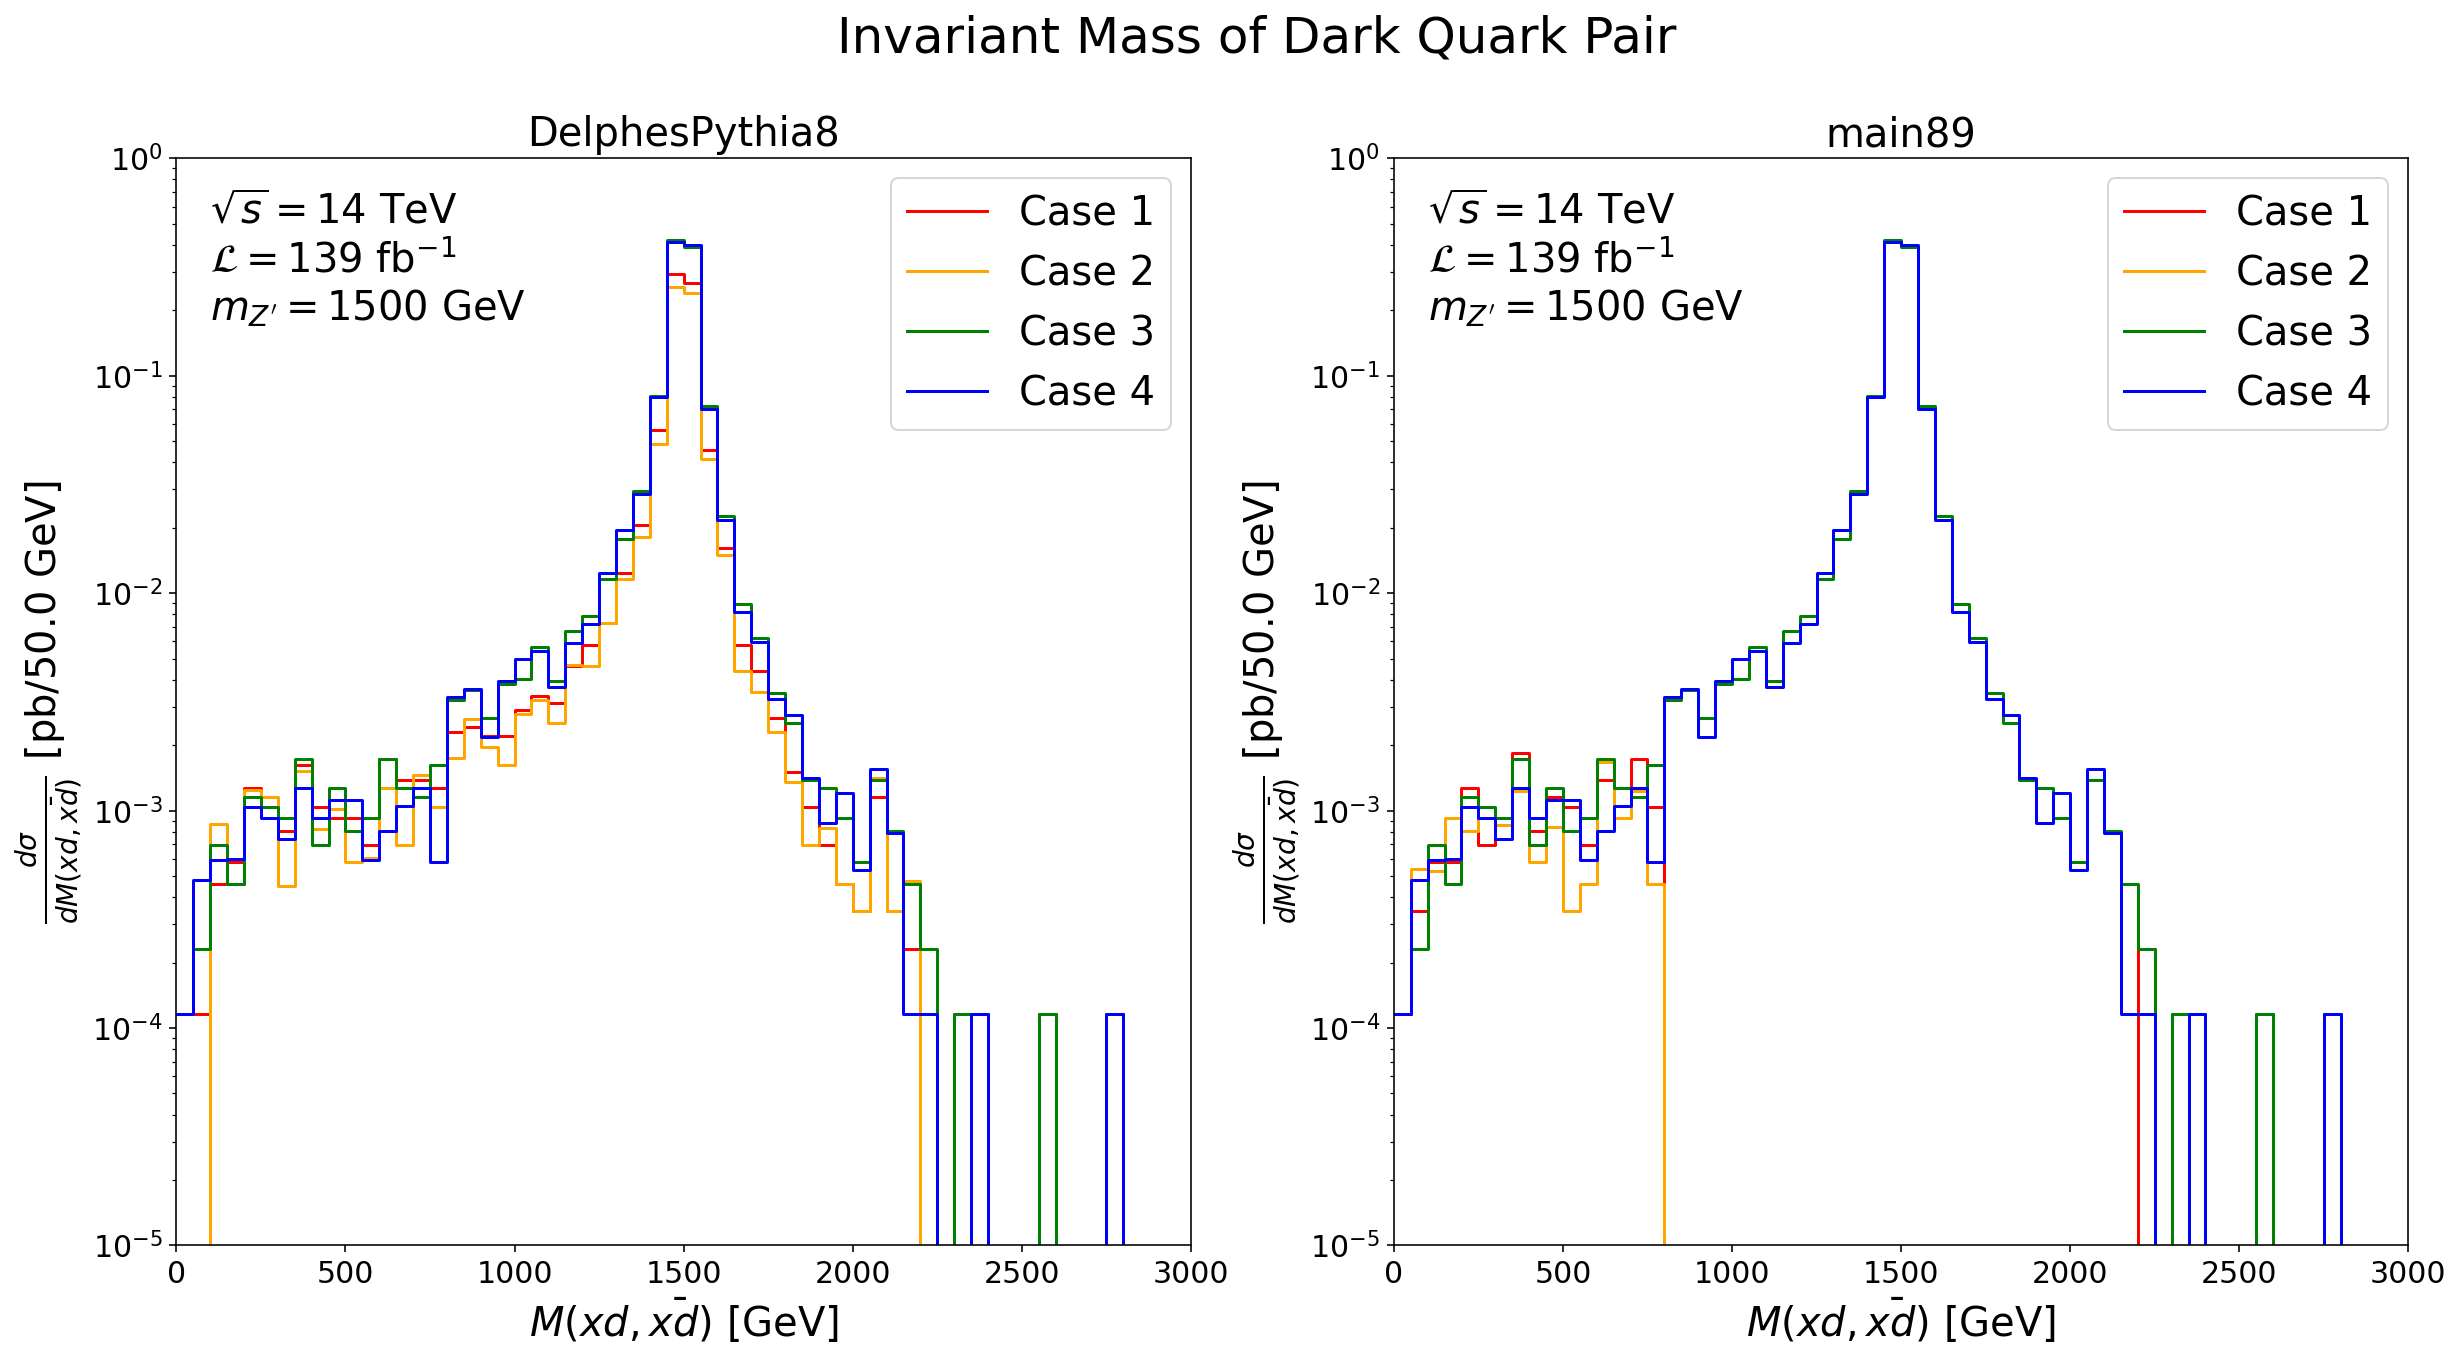

In [16]:
# 1. Figure
fig, axs = plt.subplots(1, 2, figsize=(20,10))
binning = np.linspace(0, 5000, 101)

################################################################################
# 2. Data
hist0_1, bins0_1 = np.histogram(M_xdxdx_23_82, bins=binning, weights=weight_82)
hist0_2, bins0_2 = np.histogram(M_xdxdx_23_88, bins=binning, weights=weight_88)
hist0_3, bins0_3 = np.histogram(M_xdxdx_23_83, bins=binning, weights=weight_83)
hist0_4, bins0_4 = np.histogram(M_xdxdx_23_84, bins=binning, weights=weight_84)

hist1_1, bins1_1 = np.histogram(M_xdxdx_23_2, bins=binning, weights=weight_2)
hist1_2, bins1_2 = np.histogram(M_xdxdx_23_8, bins=binning, weights=weight_8)
hist1_3, bins1_3 = np.histogram(M_xdxdx_23_3, bins=binning, weights=weight_3)
hist1_4, bins1_4 = np.histogram(M_xdxdx_23_4, bins=binning, weights=weight_4)

# 3. Plot
axs[0].step(bins0_1[:-1], hist0_1, where='post', color='red', label="Case 1")
axs[0].step(bins0_2[:-1], hist0_2, where='post', color='orange', label="Case 2")
axs[0].step(bins0_3[:-1], hist0_3, where='post', color='green', label="Case 3")
axs[0].step(bins0_4[:-1], hist0_4, where='post', color='blue', label="Case 4")

axs[1].step(bins1_1[:-1], hist1_1, where='post', color='red', label="Case 1")
axs[1].step(bins1_2[:-1], hist1_2, where='post', color='orange', label="Case 2")
axs[1].step(bins1_3[:-1], hist1_3, where='post', color='green', label="Case 3")
axs[1].step(bins1_4[:-1], hist1_4, where='post', color='blue', label="Case 4")

# 4. axes setting
# title and legend
fig.suptitle("Invariant Mass of Dark Quark Pair", fontsize=25)
axs[0].legend(fontsize=20)
axs[1].legend(fontsize=20)
# sub-title and x & y labels
ylabel = "$\\frac{d\sigma}{dM(xd,\\bar{xd})}$ [pb/"+str(binning[-1]/(len(binning)-1))+" GeV]"
axs[0].set_title("DelphesPythia8", fontsize=20)
axs[0].set_xlabel("$M(xd,\\bar{xd})$ [GeV]", fontsize=20)
axs[0].set_ylabel(ylabel, fontsize=20)
axs[1].set_title("main89", fontsize=20)
axs[1].set_xlabel("$M(xd,\\bar{xd})$ [GeV]", fontsize=20)
axs[1].set_ylabel(ylabel, fontsize=20)
# x & y axes limits, scales, and tick
axs[0].set_xlim(0, 3000)
axs[0].set_ylim(1/100000, 1)
axs[0].set_yscale('log')
axs[0].tick_params(axis='both', labelsize=15)
axs[1].set_xlim(0, 3000)
axs[1].set_ylim(1/100000, 1)
axs[1].set_yscale('log')
axs[1].tick_params(axis='both', labelsize=15)

# 5. text
tex1 = "$\sqrt{s} = 14$ TeV"
tex2 = "$\mathcal{L} = $"+str(int(LUMINOSITY/1000))+" $\mathrm{fb}^{-1}$"
tex3 = "$m_{Z^\prime} = 1500$ GeV"
axs[0].text(100, 0.5, tex1, fontsize=20)
axs[0].text(100, 0.3, tex2, fontsize=20)
axs[0].text(100, 0.18, tex3, fontsize=20)
axs[1].text(100, 0.5, tex1, fontsize=20)
axs[1].text(100, 0.3, tex2, fontsize=20)
axs[1].text(100, 0.18, tex3, fontsize=20)

plt.savefig("figures-2/fig1-1_DQP_DP8_main89_Mxdxdx.pdf")
plt.show()

In [17]:
print("DP8:")
print("Cross-section = {} pb".format(np.sum(hist0_1)[0]))
print("Cross-section = {} pb".format(np.sum(hist0_2)[0]))
print("Cross-section = {} pb".format(np.sum(hist0_3)[0]))
print("Cross-section = {} pb".format(np.sum(hist0_4)[0]))
print('='*39)
print("main89:")
print("Cross-section = {} pb".format(np.sum(hist1_1)[0]))
print("Cross-section = {} pb".format(np.sum(hist1_2)[0]))
print("Cross-section = {} pb".format(np.sum(hist1_3)[0]))
print("Cross-section = {} pb".format(np.sum(hist1_4)[0]))

DP8:
Cross-section = 0.7842158675193787 pb
Cross-section = 0.6916795969009399 pb
Cross-section = 1.1329519748687744 pb
Cross-section = 1.1259729862213135 pb
main89:
Cross-section = 0.016168383906028927 pb
Cross-section = 0.012788425659692078 pb
Cross-section = 1.1328262695299656 pb
Cross-section = 1.1259142258591786 pb


#### Conclusion: The cross-sections have no problem.

#### 2. $M(xd,\bar{xd})$ for DP8 vs. main89

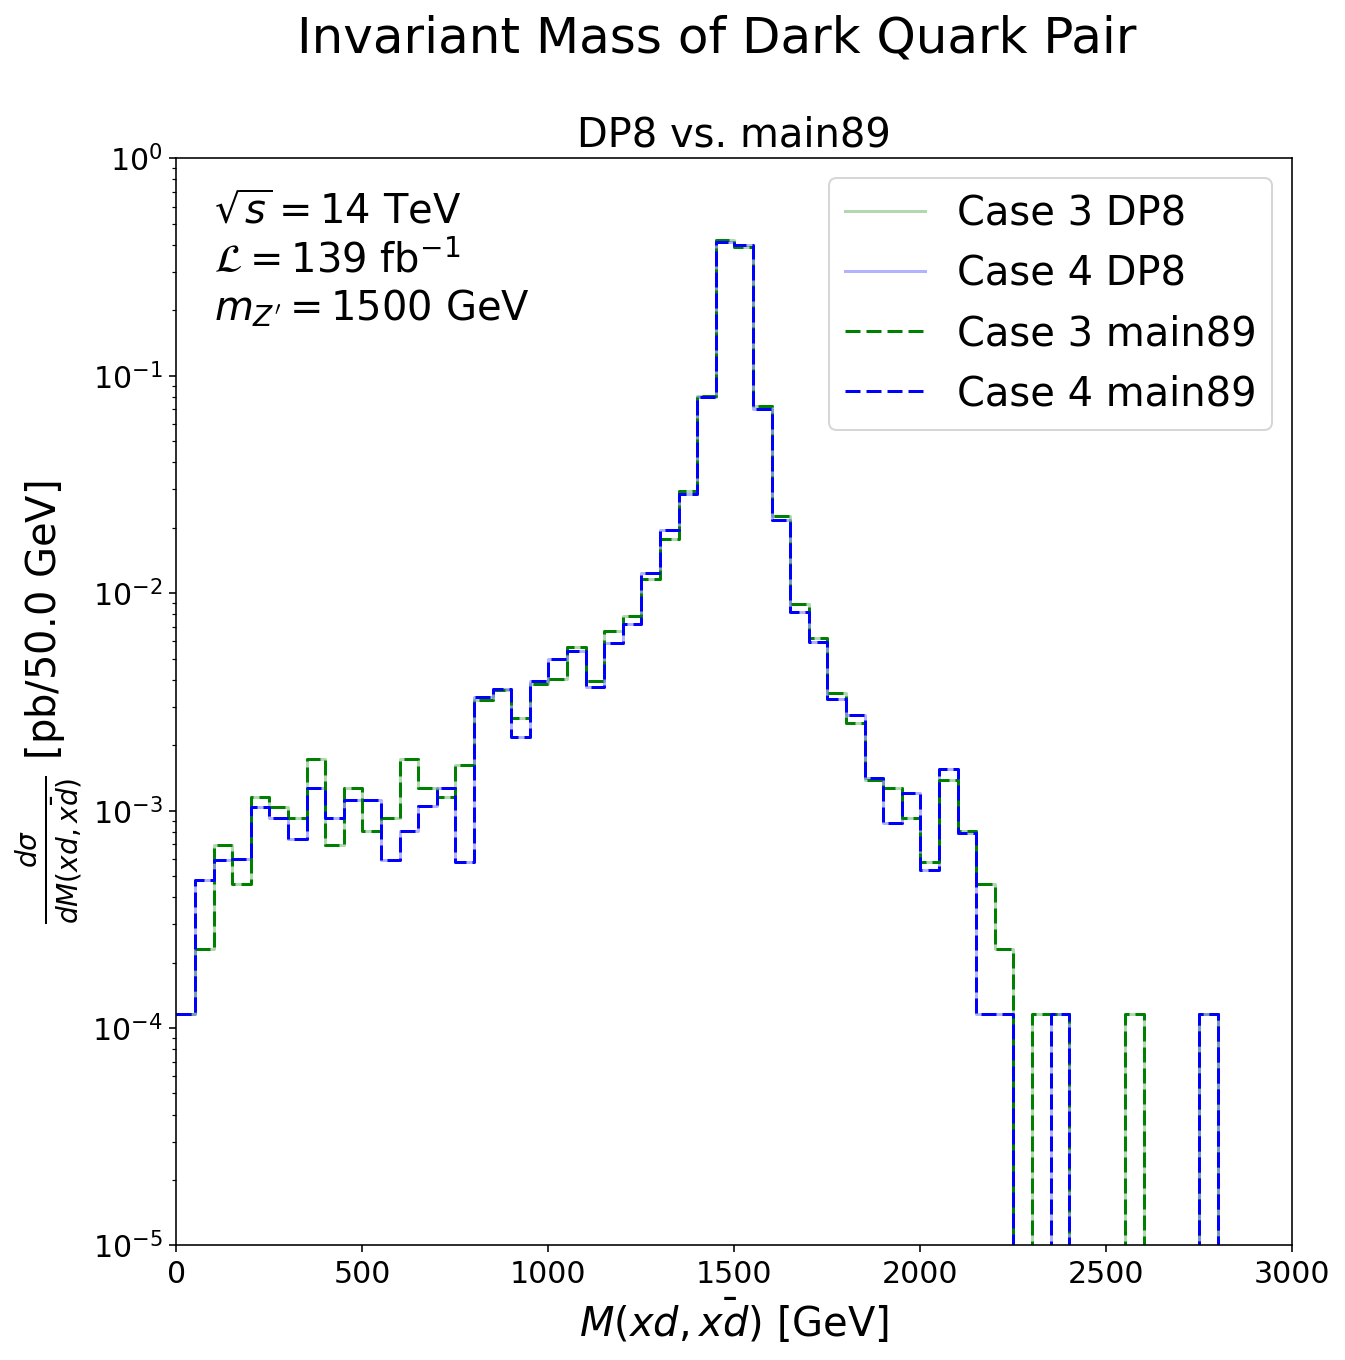

In [18]:
# 1. Figure
fig1_2, ax = plt.subplots(figsize=(10,10))
binning = np.linspace(0, 5000, 101)

################################################################################
# 2. Data
hist0_1, bins0_1 = np.histogram(M_xdxdx_23_83, bins=binning, weights=weight_83)
hist0_2, bins0_2 = np.histogram(M_xdxdx_23_84, bins=binning, weights=weight_84)

hist1_1, bins1_1 = np.histogram(M_xdxdx_23_3, bins=binning, weights=weight_3)
hist1_2, bins1_2 = np.histogram(M_xdxdx_23_4, bins=binning, weights=weight_4)

# 3. Plot
ax.step(bins0_1[:-1], hist0_1, where='post', color='green', alpha=0.3, label="Case 3 DP8")
ax.step(bins0_2[:-1], hist0_2, where='post', color='blue', alpha=0.3, label="Case 4 DP8")

ax.step(bins1_1[:-1], hist1_1, where='post',
        color='green', linestyle=(0, (5, 2)), label="Case 3 main89")
ax.step(bins1_2[:-1], hist1_2, where='post',
        color='blue', linestyle=(0, (5, 2)), label="Case 4 main89")

# 4. axes setting
# title and legend
fig1_2.suptitle("Invariant Mass of Dark Quark Pair", fontsize=25)
ax.legend(fontsize=20)
# sub-title and x & y labels
ylabel = "$\\frac{d\sigma}{dM(xd,\\bar{xd})}$ [pb/"+str(binning[-1]/(len(binning)-1))+" GeV]"
ax.set_title("DP8 vs. main89", fontsize=20)
ax.set_xlabel("$M(xd,\\bar{xd})$ [GeV]", fontsize=20)
ax.set_ylabel(ylabel, fontsize=20)
# x & y axes limits, scales, and tick
ax.set_xlim(0, 3000)
ax.set_ylim(1/100000, 1)
ax.set_yscale('log')
ax.tick_params(axis='both', labelsize=15)

# 5. text
tex1 = "$\sqrt{s} = 14$ TeV"
tex2 = "$\mathcal{L} = $"+str(int(LUMINOSITY/1000))+" $\mathrm{fb}^{-1}$"
tex3 = "$m_{Z^\prime} = 1500$ GeV"
ax.text(100, 0.5, tex1, fontsize=20)
ax.text(100, 0.3, tex2, fontsize=20)
ax.text(100, 0.18, tex3, fontsize=20)

plt.savefig("figures-2/fig1-2_DQP_DP8_main89_Mxdxdx.pdf")
plt.show()

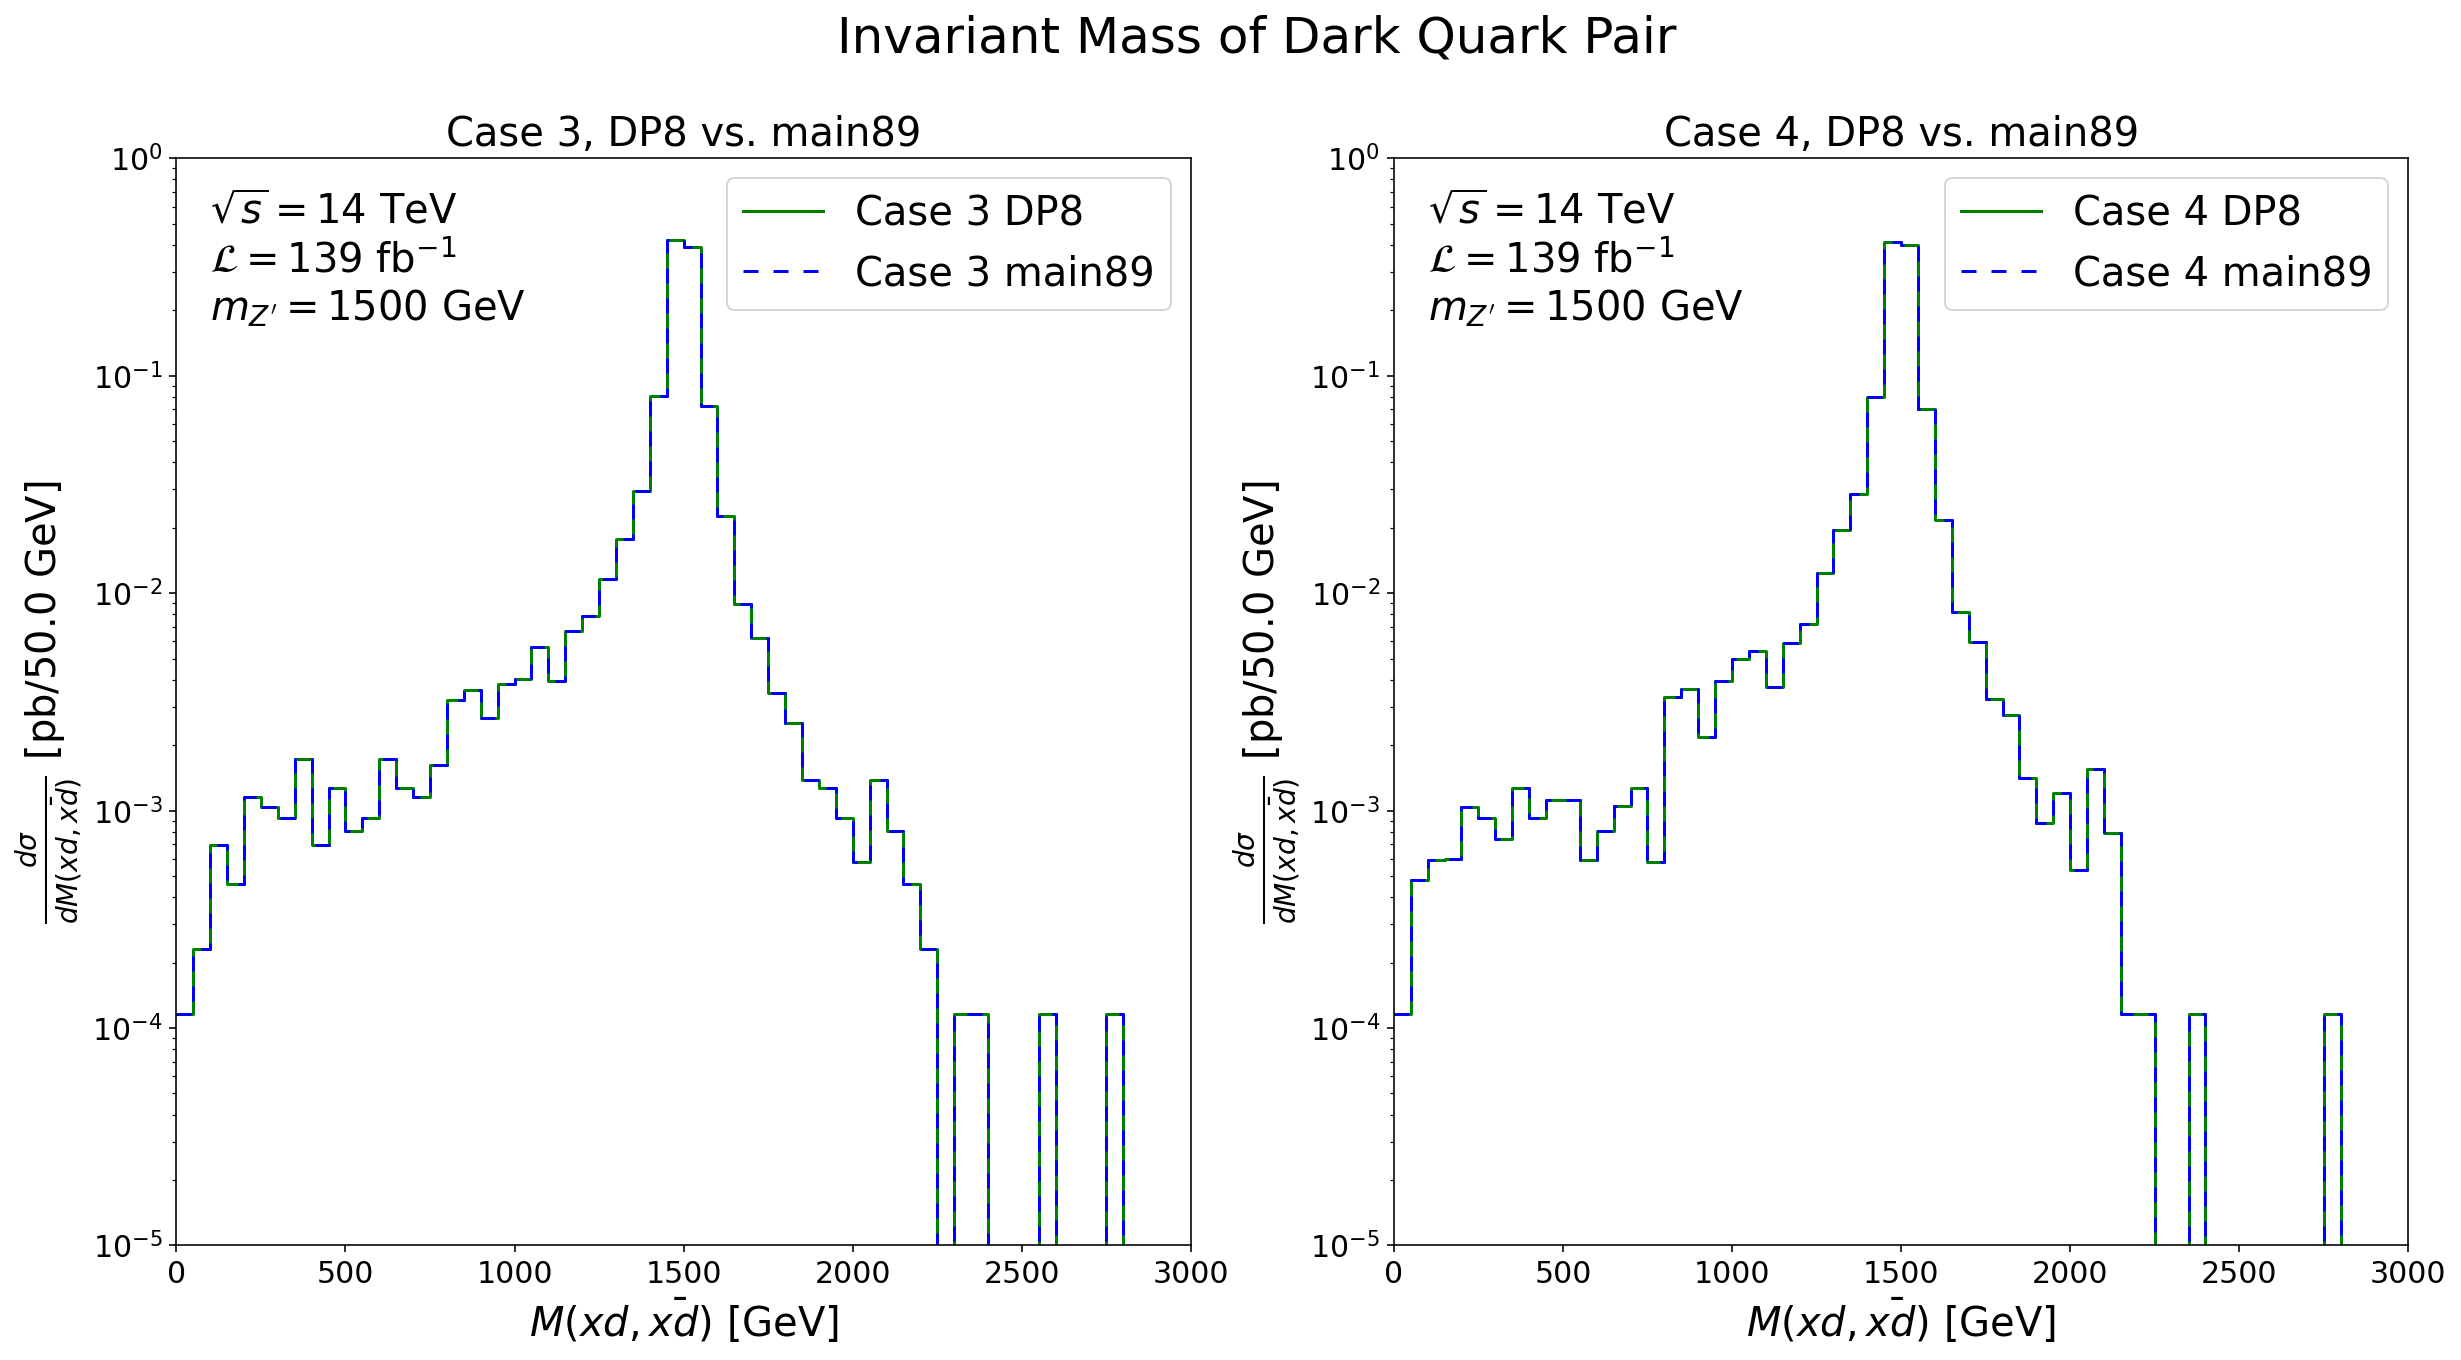

In [19]:
# 1. Figure
fig1_3, axs = plt.subplots(1, 2, figsize=(20,10))
binning = np.linspace(0, 5000, 101)

################################################################################
# 2. Data
hist0_1, bins0_1 = np.histogram(M_xdxdx_23_83, bins=binning, weights=weight_83)
hist0_2, bins0_2 = np.histogram(M_xdxdx_23_3, bins=binning, weights=weight_3)

hist1_1, bins1_1 = np.histogram(M_xdxdx_23_84, bins=binning, weights=weight_84)
hist1_2, bins1_2 = np.histogram(M_xdxdx_23_4, bins=binning, weights=weight_4)

# 3. Plot
axs[0].step(bins0_1[:-1], hist0_1, where='post', color='green', label="Case 3 DP8")
axs[0].step(bins0_2[:-1], hist0_2, where='post',
            color='blue', linestyle=(0, (5, 5)), label="Case 3 main89")

axs[1].step(bins1_1[:-1], hist1_1, where='post', color='green', label="Case 4 DP8")
axs[1].step(bins1_2[:-1], hist1_2, where='post',
            color='blue', linestyle=(0, (5, 5)), label="Case 4 main89")

# 4. axes setting
# title and legend
fig1_3.suptitle("Invariant Mass of Dark Quark Pair", fontsize=25)
axs[0].legend(fontsize=20)
axs[1].legend(fontsize=20)
# sub-title and x & y labels
ylabel = "$\\frac{d\sigma}{dM(xd,\\bar{xd})}$ [pb/"+str(binning[-1]/(len(binning)-1))+" GeV]"
axs[0].set_title("Case 3, DP8 vs. main89", fontsize=20)
axs[0].set_xlabel("$M(xd,\\bar{xd})$ [GeV]", fontsize=20)
axs[0].set_ylabel(ylabel, fontsize=20)
axs[1].set_title("Case 4, DP8 vs. main89", fontsize=20)
axs[1].set_xlabel("$M(xd,\\bar{xd})$ [GeV]", fontsize=20)
axs[1].set_ylabel(ylabel, fontsize=20)
# x & y axes limits, scales, and tick
axs[0].set_xlim(0, 3000)
axs[0].set_ylim(1/100000, 1)
axs[0].set_yscale('log')
axs[0].tick_params(axis='both', labelsize=15)
axs[1].set_xlim(0, 3000)
axs[1].set_ylim(1/100000, 1)
axs[1].set_yscale('log')
axs[1].tick_params(axis='both', labelsize=15)

# 5. text
tex1 = "$\sqrt{s} = 14$ TeV"
tex2 = "$\mathcal{L} = $"+str(int(LUMINOSITY/1000))+" $\mathrm{fb}^{-1}$"
tex3 = "$m_{Z^\prime} = 1500$ GeV"
axs[0].text(100, 0.5, tex1, fontsize=20)
axs[0].text(100, 0.3, tex2, fontsize=20)
axs[0].text(100, 0.18, tex3, fontsize=20)
axs[1].text(100, 0.5, tex1, fontsize=20)
axs[1].text(100, 0.3, tex2, fontsize=20)
axs[1].text(100, 0.18, tex3, fontsize=20)

plt.savefig("figures-2/fig1-3_DQP_DP8_main89_Mxdxdx.pdf")
plt.show()

#### Conclusion: For Case3 and 4, the DP8 and main89 are the same.

### 3-2. Jet in the truth level

#### 1. Leading jet $p_T$ for DP8 and main89

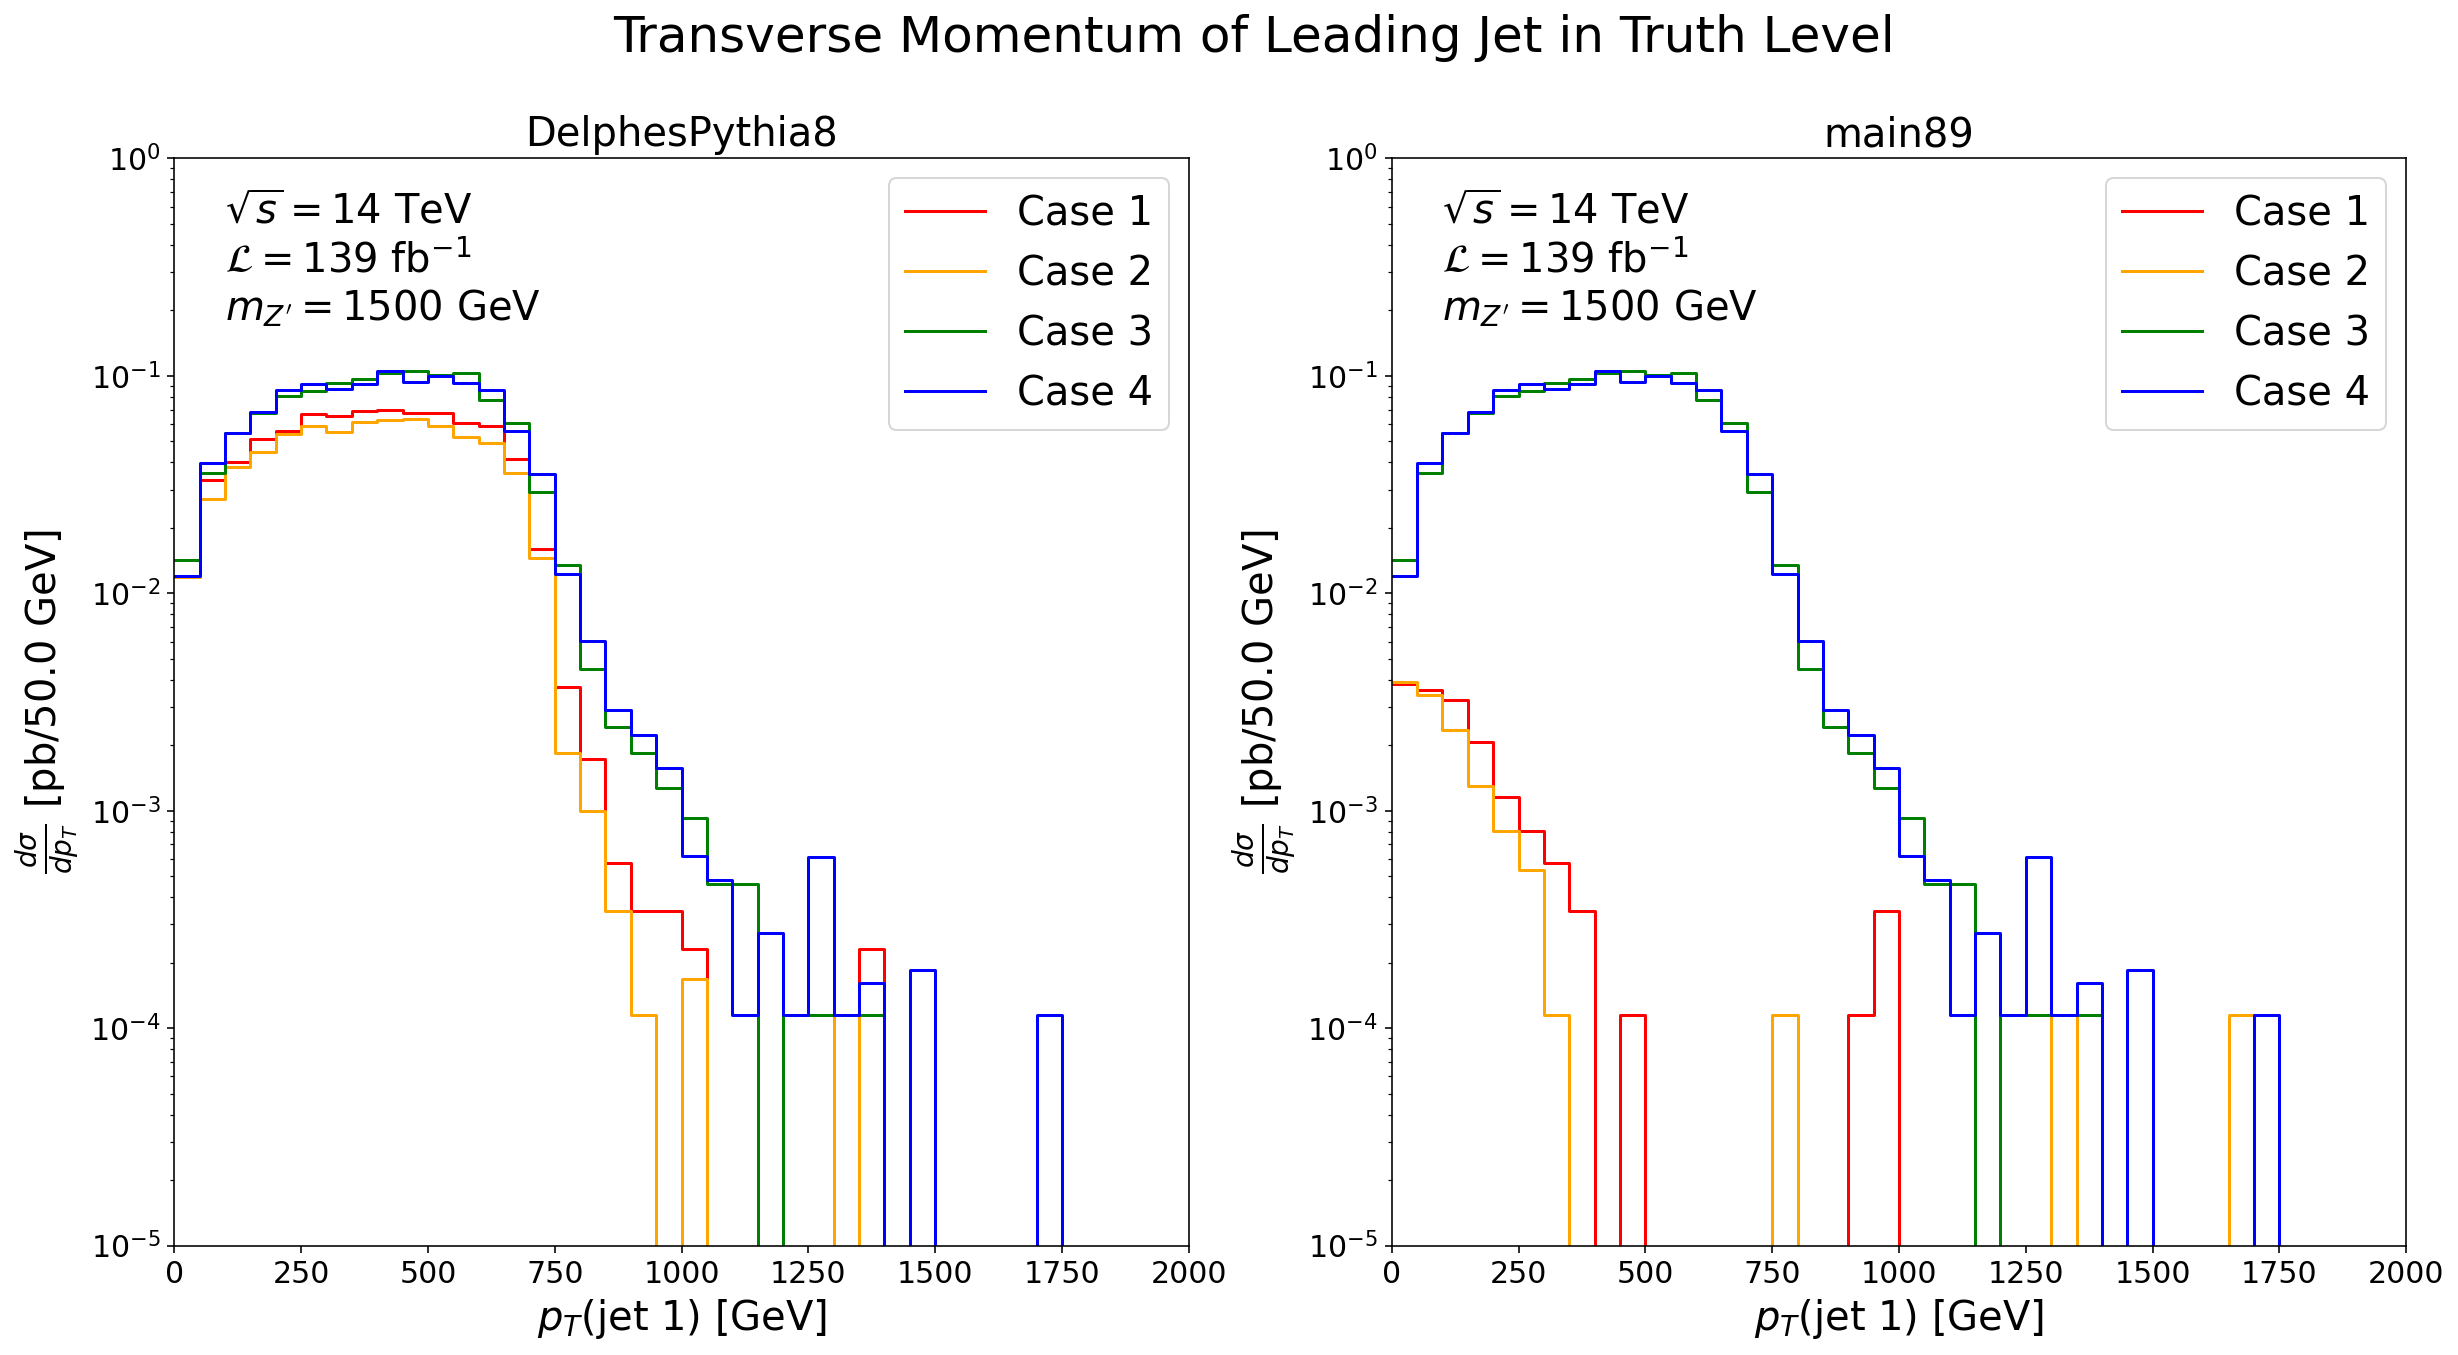

In [20]:
# 1. Figure
fig2_1, axs = plt.subplots(1, 2, figsize=(20,10))
binning = np.linspace(0, 5000, 101)

################################################################################
# 2. Data
hist0_1, bins0_1 = np.histogram(truth_jet_filterDM_82[4], bins=binning, weights=weight_82[s_t_j_fDM_82])
hist0_2, bins0_2 = np.histogram(truth_jet_filterDM_88[4], bins=binning, weights=weight_88[s_t_j_fDM_88])
hist0_3, bins0_3 = np.histogram(truth_jet_filterDM_83[4], bins=binning, weights=weight_83[s_t_j_fDM_83])
hist0_4, bins0_4 = np.histogram(truth_jet_filterDM_84[4], bins=binning, weights=weight_84[s_t_j_fDM_84])
# hist0_5, bins0_5 = np.histogram(M_xdxdx_23, bins=binning, weights=weight*LUMINOSITY)

hist1_1, bins1_1 = np.histogram(truth_jet_filterDM_2[4], bins=binning, weights=weight_2[s_t_j_fDM_2])
hist1_2, bins1_2 = np.histogram(truth_jet_filterDM_8[4], bins=binning, weights=weight_8[s_t_j_fDM_8])
hist1_3, bins1_3 = np.histogram(truth_jet_filterDM_3[4], bins=binning, weights=weight_3[s_t_j_fDM_3])
hist1_4, bins1_4 = np.histogram(truth_jet_filterDM_4[4], bins=binning, weights=weight_4[s_t_j_fDM_4])

# 3. Plot
axs[0].step(bins0_1[:-1], hist0_1, where='post', color='red', label="Case 1")
axs[0].step(bins0_2[:-1], hist0_2, where='post', color='orange', label="Case 2")
axs[0].step(bins0_3[:-1], hist0_3, where='post', color='green', label="Case 3")
axs[0].step(bins0_4[:-1], hist0_4, where='post', color='blue', label="Case 4")
# axs[0].step(bins0_5[:-1], hist0_5/np.sum(hist0_5), where='post',
#             color='black', alpha=0.3, label="$M(xd,\\bar{xd})$")

axs[1].step(bins1_1[:-1], hist1_1, where='post', color='red', label="Case 1")
axs[1].step(bins1_2[:-1], hist1_2, where='post', color='orange', label="Case 2")
axs[1].step(bins1_3[:-1], hist1_3, where='post', color='green', label="Case 3")
axs[1].step(bins1_4[:-1], hist1_4, where='post', color='blue', label="Case 4")

# 4. axes setting
# title and legend
fig2_1.suptitle("Transverse Momentum of Leading Jet in Truth Level", fontsize=25)
axs[0].legend(fontsize=20)
axs[1].legend(fontsize=20)
# sub-title and x & y labels
ylabel = "$\\frac{d\sigma}{dp_T}$ [pb/"+str(binning[-1]/(len(binning)-1))+" GeV]"
axs[0].set_title("DelphesPythia8", fontsize=20)
axs[0].set_xlabel("$p_T$(jet 1) [GeV]", fontsize=20)
axs[0].set_ylabel(ylabel, fontsize=20)
axs[1].set_title("main89", fontsize=20)
axs[1].set_xlabel("$p_T$(jet 1) [GeV]", fontsize=20)
axs[1].set_ylabel(ylabel, fontsize=20)
# x & y axes limits, scales, and tick
axs[0].set_xlim(0, 2000)
axs[0].set_ylim(1/100000, 1)
axs[0].set_yscale('log')
axs[0].tick_params(axis='both', labelsize=15)
axs[1].set_xlim(0, 2000)
axs[1].set_ylim(1/100000, 1)
axs[1].set_yscale('log')
axs[1].tick_params(axis='both', labelsize=15)

# 5. text
tex1 = "$\sqrt{s} = 14$ TeV"
tex2 = "$\mathcal{L} = $"+str(int(LUMINOSITY/1000))+" $\mathrm{fb}^{-1}$"
tex3 = "$m_{Z^\prime} = 1500$ GeV"
axs[0].text(100, 0.5, tex1, fontsize=20)
axs[0].text(100, 0.3, tex2, fontsize=20)
axs[0].text(100, 0.18, tex3, fontsize=20)
axs[1].text(100, 0.5, tex1, fontsize=20)
axs[1].text(100, 0.3, tex2, fontsize=20)
axs[1].text(100, 0.18, tex3, fontsize=20)

plt.savefig("figures-2/fig2-1_jT_DP8_main89_pT.pdf")
plt.show()

In [21]:
print("DP8:")
print("Cross-section = {} pb".format(np.sum(hist0_1)[0]))
print("Cross-section = {} pb".format(np.sum(hist0_2)[0]))
print("Cross-section = {} pb".format(np.sum(hist0_3)[0]))
print("Cross-section = {} pb".format(np.sum(hist0_4)[0]))
print('='*39)
print("main89:")
print("Cross-section = {} pb".format(np.sum(hist1_1)[0]))
print("Cross-section = {} pb".format(np.sum(hist1_2)[0]))
print("Cross-section = {} pb".format(np.sum(hist1_3)[0]))
print("Cross-section = {} pb".format(np.sum(hist1_4)[0]))

DP8:
Cross-section = 0.7842158675193787 pb
Cross-section = 0.6916801333427429 pb
Cross-section = 1.1329519748687744 pb
Cross-section = 1.1259735822677612 pb
main89:
Cross-section = 0.016168383906028927 pb
Cross-section = 0.012788425659692078 pb
Cross-section = 1.1328262695299656 pb
Cross-section = 1.1259142258591746 pb


#### Conclusion: The cross-sections have no problem.

#### 2. Leading jet $p_T$ for DP8 vs. main89

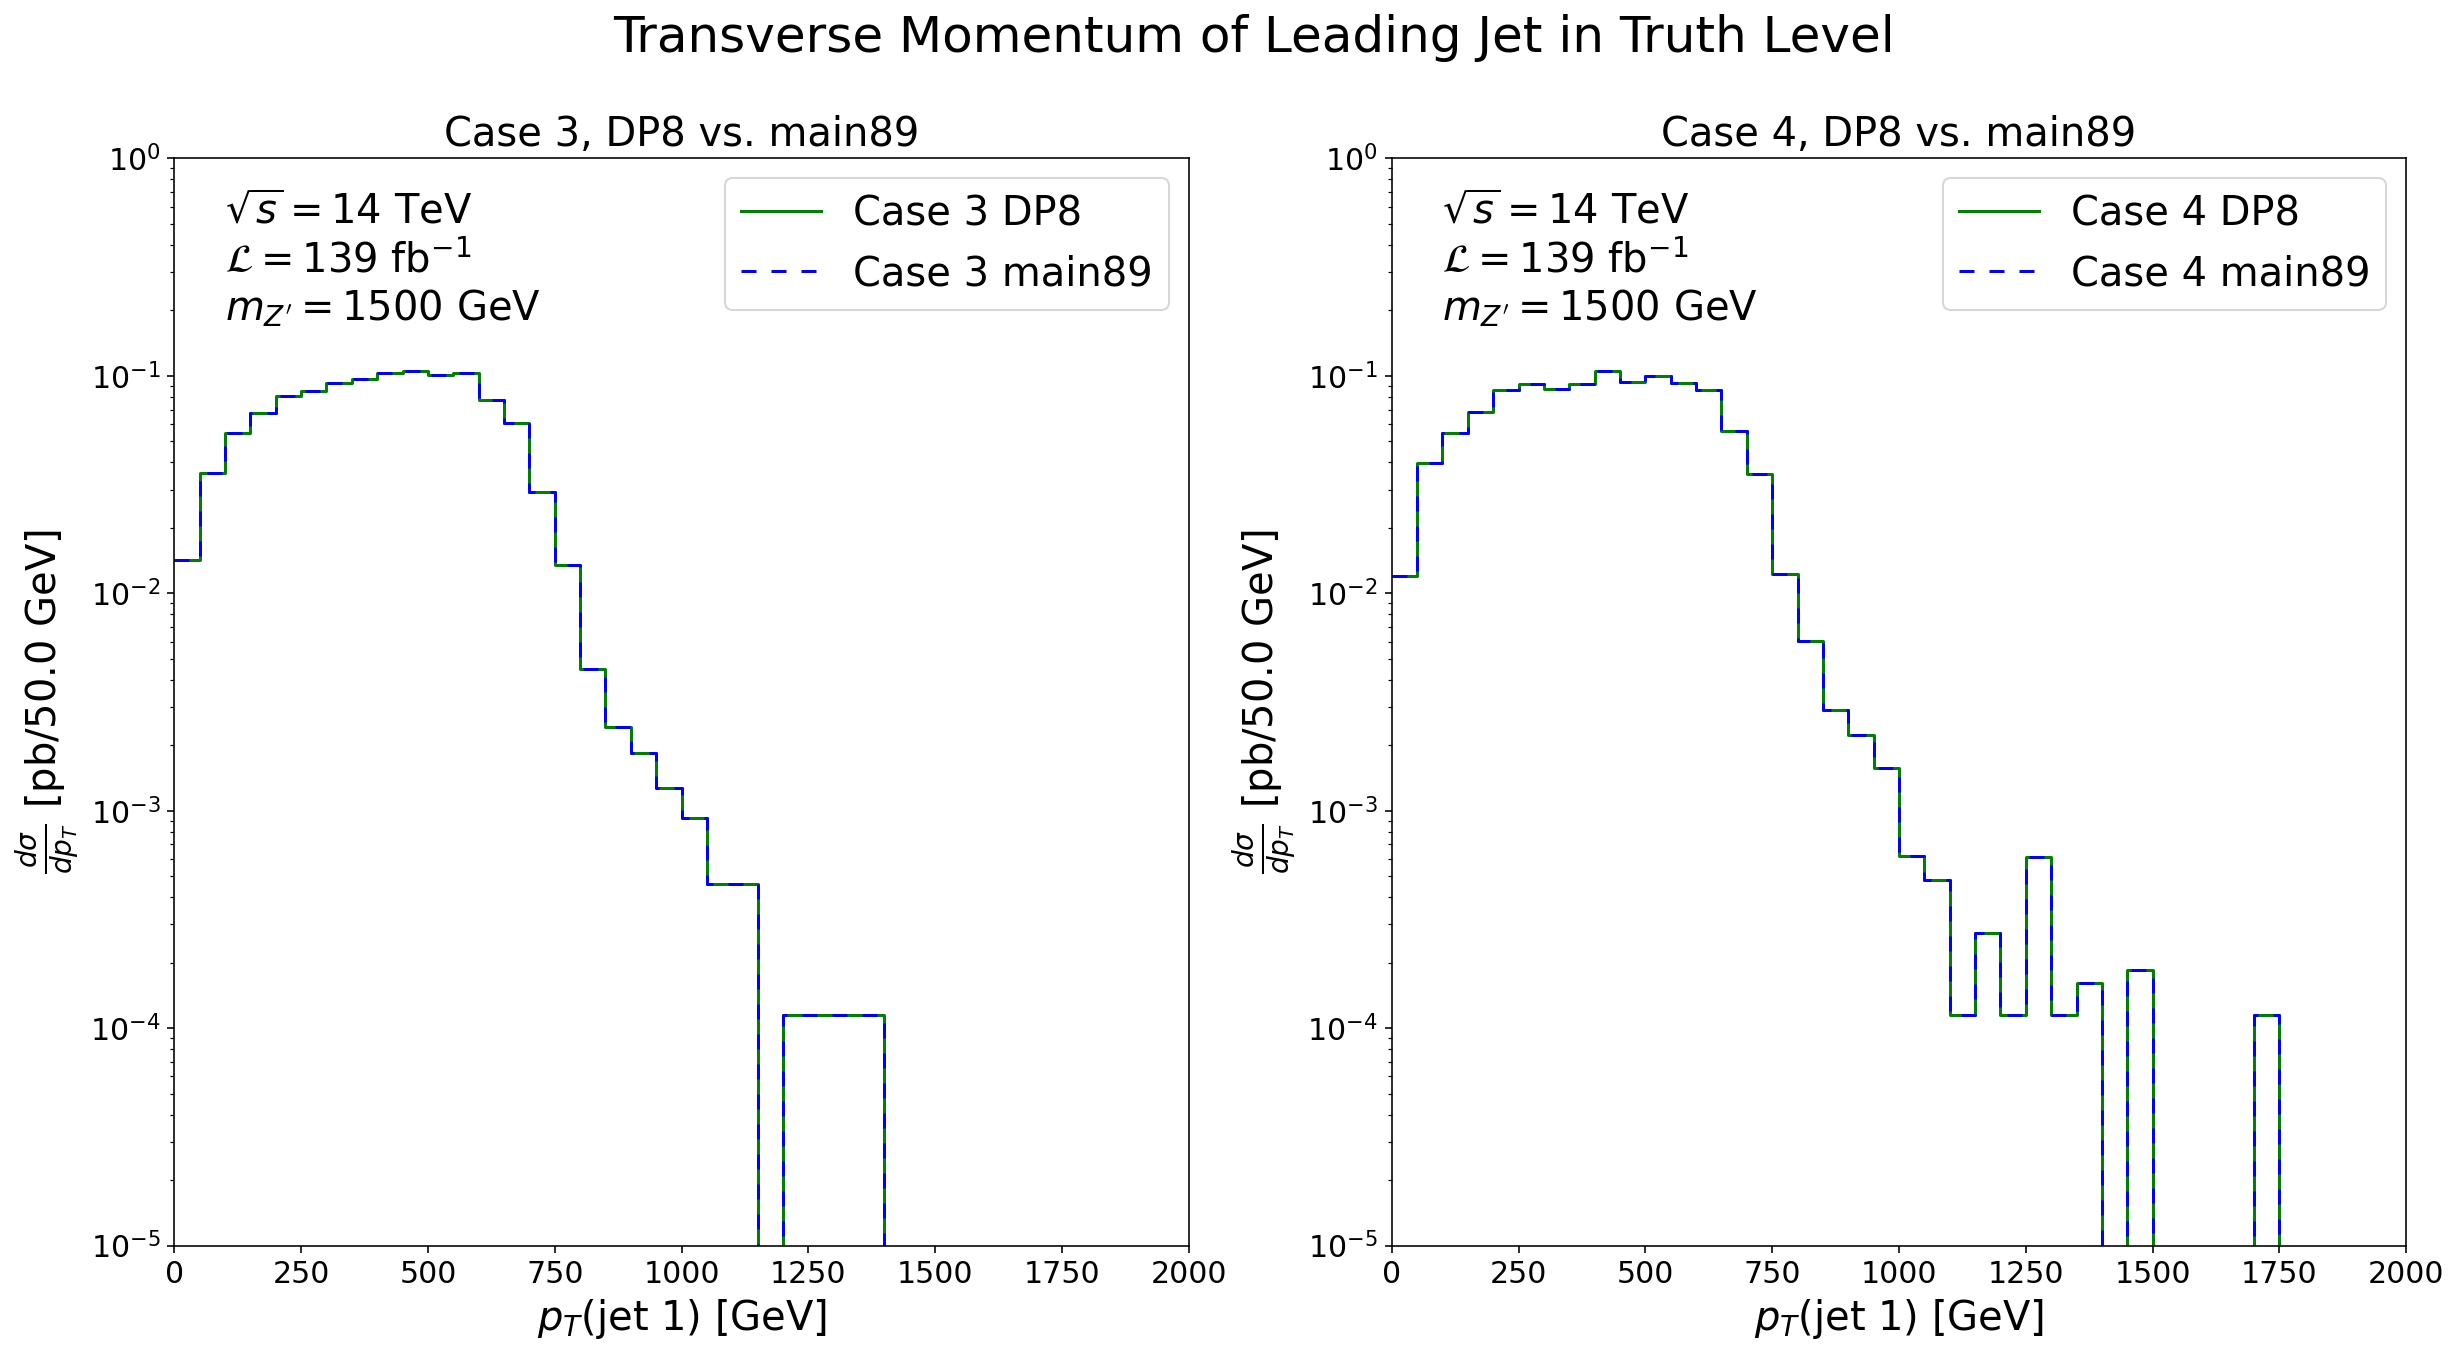

In [22]:
# 1. Figure
fig2_2, axs = plt.subplots(1, 2, figsize=(20,10))
binning = np.linspace(0, 5000, 101)

################################################################################
# 2. Data
hist0_1, bins0_1 = np.histogram(truth_jet_filterDM_83[4], bins=binning, weights=weight_83[s_t_j_fDM_83])
hist0_2, bins0_2 = np.histogram(truth_jet_filterDM_3[4], bins=binning, weights=weight_3[s_t_j_fDM_3])

hist1_1, bins1_1 = np.histogram(truth_jet_filterDM_84[4], bins=binning, weights=weight_84[s_t_j_fDM_84])
hist1_2, bins1_2 = np.histogram(truth_jet_filterDM_4[4], bins=binning, weights=weight_4[s_t_j_fDM_4])

# 3. Plot
axs[0].step(bins0_1[:-1], hist0_1, where='post', color='green', label="Case 3 DP8")
axs[0].step(bins0_2[:-1], hist0_2, where='post',
            color='blue', linestyle=(0, (5, 5)), label="Case 3 main89")

axs[1].step(bins1_1[:-1], hist1_1, where='post', color='green', label="Case 4 DP8")
axs[1].step(bins1_2[:-1], hist1_2, where='post',
            color='blue', linestyle=(0, (5, 5)), label="Case 4 main89")

# 4. axes setting
# title and legend
fig2_2.suptitle("Transverse Momentum of Leading Jet in Truth Level", fontsize=25)
axs[0].legend(fontsize=20)
axs[1].legend(fontsize=20)
# sub-title and x & y labels
ylabel = "$\\frac{d\sigma}{dp_T}$ [pb/"+str(binning[-1]/(len(binning)-1))+" GeV]"
axs[0].set_title("Case 3, DP8 vs. main89", fontsize=20)
axs[0].set_xlabel("$p_T$(jet 1) [GeV]", fontsize=20)
axs[0].set_ylabel(ylabel, fontsize=20)
axs[1].set_title("Case 4, DP8 vs. main89", fontsize=20)
axs[1].set_xlabel("$p_T$(jet 1) [GeV]", fontsize=20)
axs[1].set_ylabel(ylabel, fontsize=20)
# x & y axes limits, scales, and tick
axs[0].set_xlim(0, 2000)
axs[0].set_ylim(1/100000, 1)
axs[0].set_yscale('log')
axs[0].tick_params(axis='both', labelsize=15)
axs[1].set_xlim(0, 2000)
axs[1].set_ylim(1/100000, 1)
axs[1].set_yscale('log')
axs[1].tick_params(axis='both', labelsize=15)

# 5. text
tex1 = "$\sqrt{s} = 14$ TeV"
tex2 = "$\mathcal{L} = $"+str(int(LUMINOSITY/1000))+" $\mathrm{fb}^{-1}$"
tex3 = "$m_{Z^\prime} = 1500$ GeV"
axs[0].text(100, 0.5, tex1, fontsize=20)
axs[0].text(100, 0.3, tex2, fontsize=20)
axs[0].text(100, 0.18, tex3, fontsize=20)
axs[1].text(100, 0.5, tex1, fontsize=20)
axs[1].text(100, 0.3, tex2, fontsize=20)
axs[1].text(100, 0.18, tex3, fontsize=20)

plt.savefig("figures-2/fig2-2_jT_DP8_main89_pT.pdf")
plt.show()

#### Conclusion: For Case3 and 4, the DP8 and main89 are the same.

#### 3. $M(jj)$ for DP8 and main89

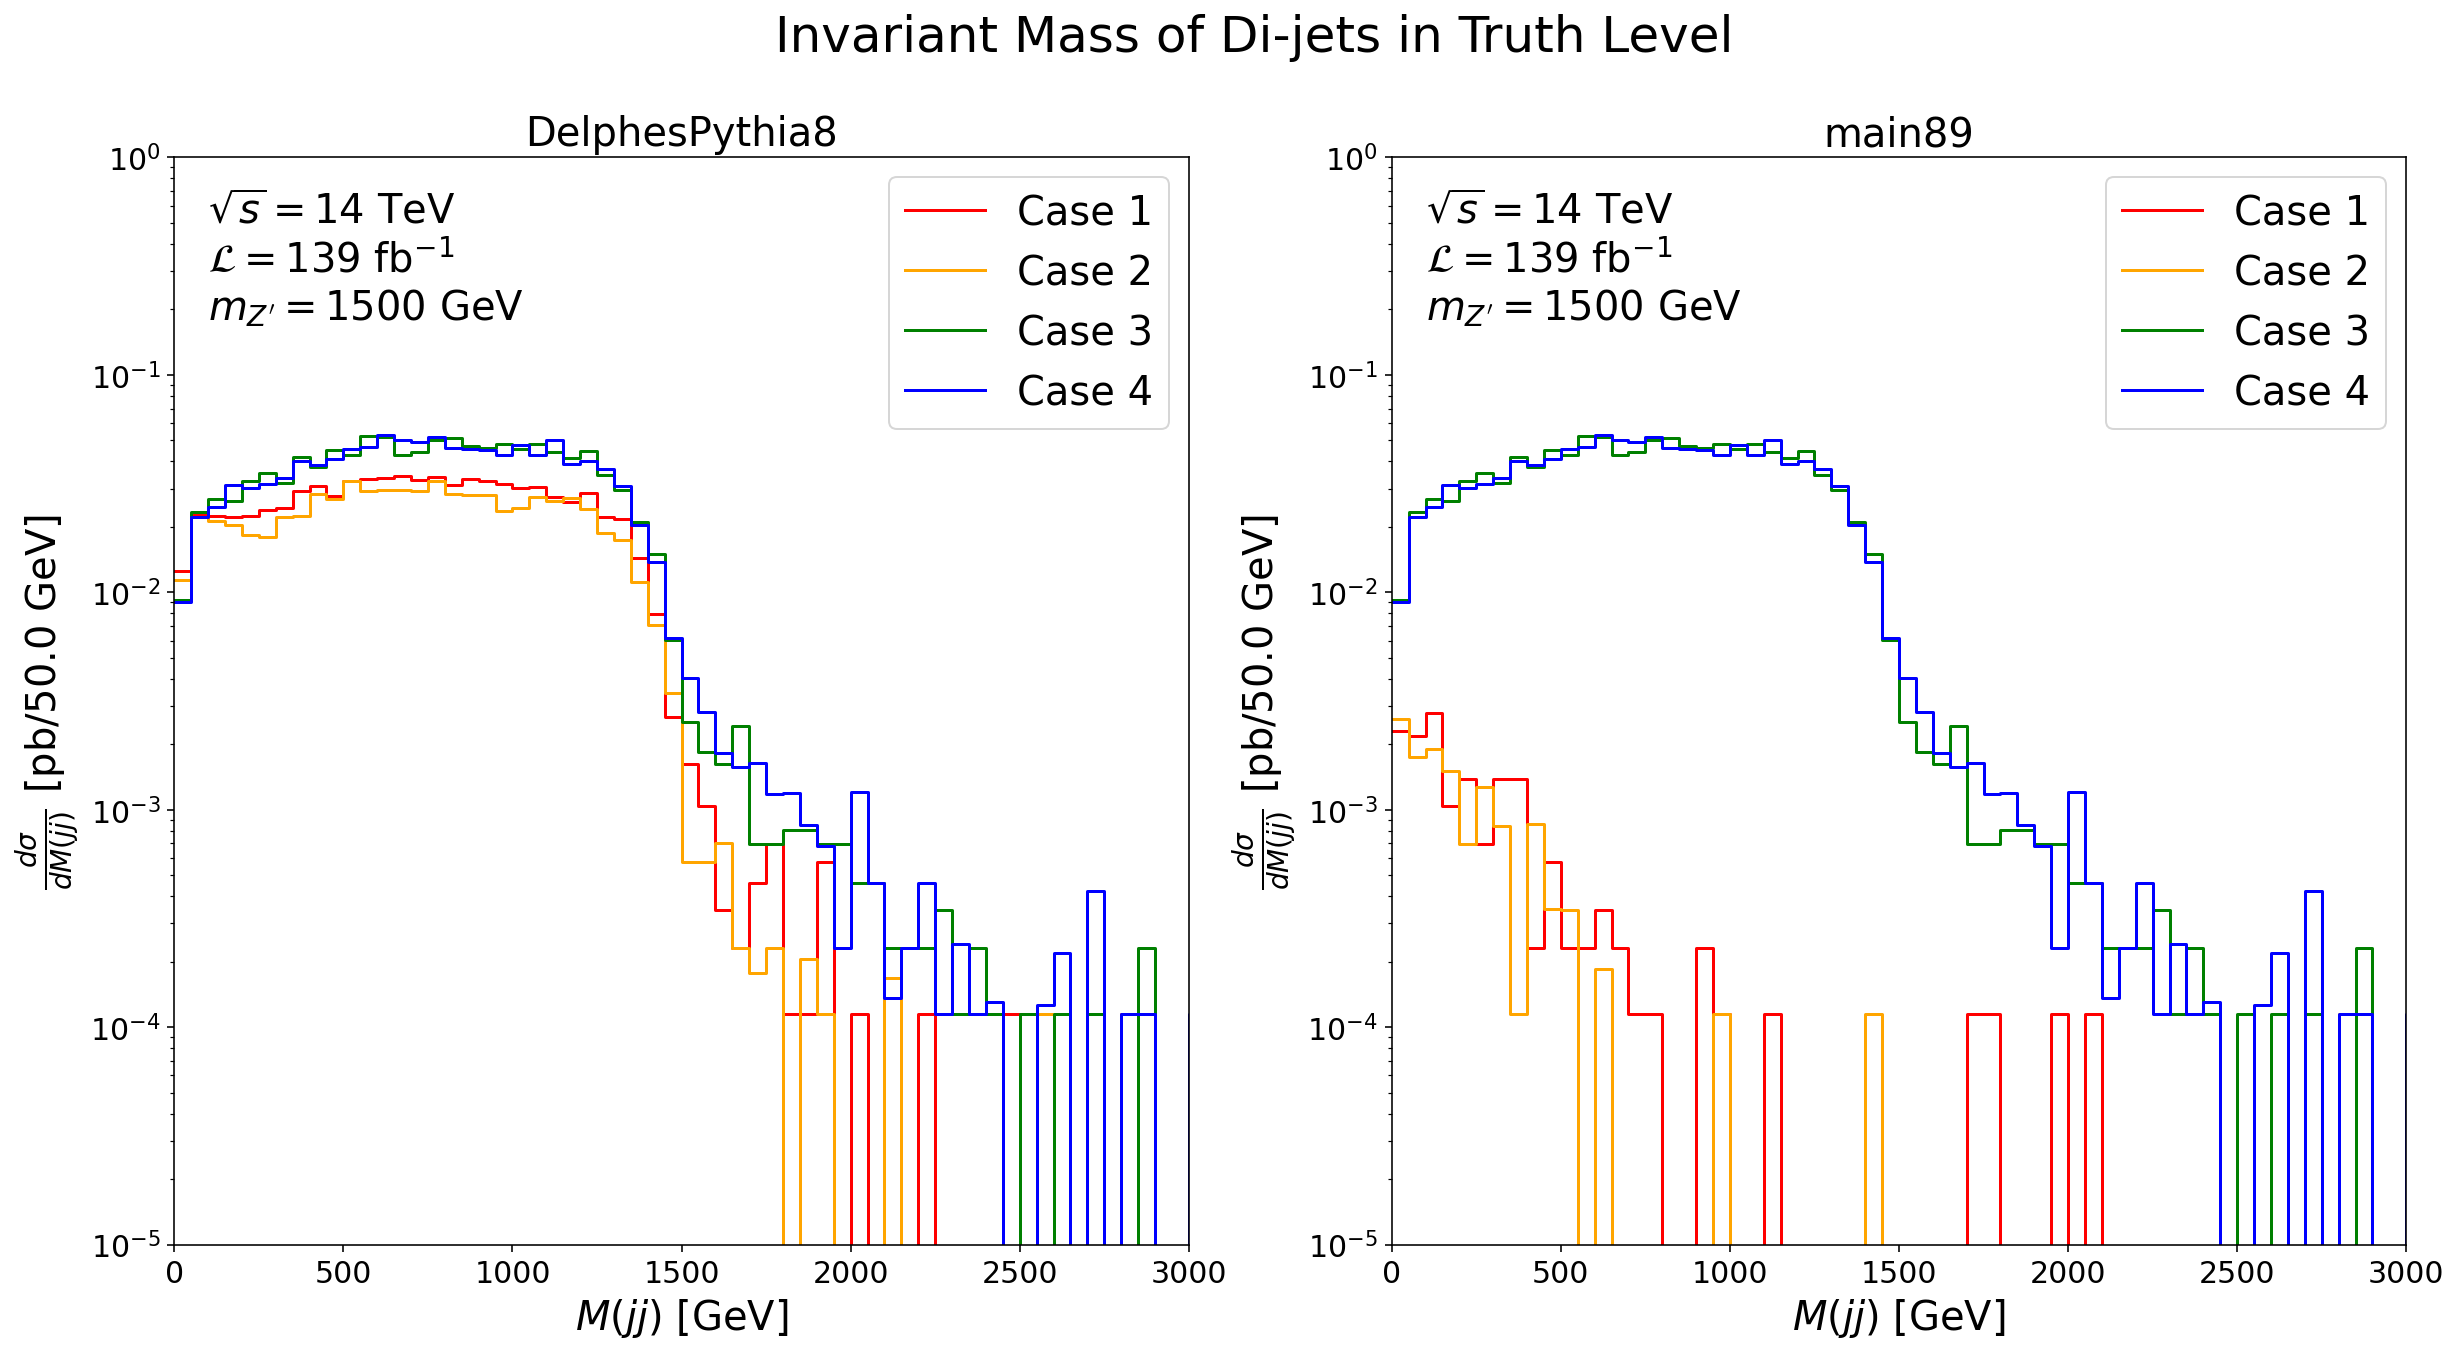

In [23]:
# 1. Figure
fig2_3, axs = plt.subplots(1, 2, figsize=(20,10))
binning = np.linspace(0, 5000, 101)

################################################################################
# 2. Data
hist0_1, bins0_1 = np.histogram(truth_jet_filterDM_82[0], bins=binning, weights=weight_82[s_t_j_fDM_82])
hist0_2, bins0_2 = np.histogram(truth_jet_filterDM_88[0], bins=binning, weights=weight_88[s_t_j_fDM_88])
hist0_3, bins0_3 = np.histogram(truth_jet_filterDM_83[0], bins=binning, weights=weight_83[s_t_j_fDM_83])
hist0_4, bins0_4 = np.histogram(truth_jet_filterDM_84[0], bins=binning, weights=weight_84[s_t_j_fDM_84])
# hist0_5, bins0_5 = np.histogram(M_xdxdx_23, bins=binning, weights=weight*LUMINOSITY)

hist1_1, bins1_1 = np.histogram(truth_jet_filterDM_2[0], bins=binning, weights=weight_2[s_t_j_fDM_2])
hist1_2, bins1_2 = np.histogram(truth_jet_filterDM_8[0], bins=binning, weights=weight_8[s_t_j_fDM_8])
hist1_3, bins1_3 = np.histogram(truth_jet_filterDM_3[0], bins=binning, weights=weight_3[s_t_j_fDM_3])
hist1_4, bins1_4 = np.histogram(truth_jet_filterDM_4[0], bins=binning, weights=weight_4[s_t_j_fDM_4])

# 3. Plot
axs[0].step(bins0_1[:-1], hist0_1, where='post', color='red', label="Case 1")
axs[0].step(bins0_2[:-1], hist0_2, where='post', color='orange', label="Case 2")
axs[0].step(bins0_3[:-1], hist0_3, where='post', color='green', label="Case 3")
axs[0].step(bins0_4[:-1], hist0_4, where='post', color='blue', label="Case 4")
# axs[0].step(bins0_5[:-1], hist0_5/np.sum(hist0_5), where='post',
#             color='black', alpha=0.3, label="$M(xd,\\bar{xd})$")

axs[1].step(bins1_1[:-1], hist1_1, where='post', color='red', label="Case 1")
axs[1].step(bins1_2[:-1], hist1_2, where='post', color='orange', label="Case 2")
axs[1].step(bins1_3[:-1], hist1_3, where='post', color='green', label="Case 3")
axs[1].step(bins1_4[:-1], hist1_4, where='post', color='blue', label="Case 4")

# 4. axes setting
# title and legend
fig2_3.suptitle("Invariant Mass of Di-jets in Truth Level", fontsize=25)
axs[0].legend(fontsize=20)
axs[1].legend(fontsize=20)
# sub-title and x & y labels
ylabel = "$\\frac{d\sigma}{dM(jj)}$ [pb/"+str(binning[-1]/(len(binning)-1))+" GeV]"
axs[0].set_title("DelphesPythia8", fontsize=20)
axs[0].set_xlabel("$M(jj)$ [GeV]", fontsize=20)
axs[0].set_ylabel(ylabel, fontsize=20)
axs[1].set_title("main89", fontsize=20)
axs[1].set_xlabel("$M(jj)$ [GeV]", fontsize=20)
axs[1].set_ylabel(ylabel, fontsize=20)
# x & y axes limits, scales, and tick
axs[0].set_xlim(0, 3000)
axs[0].set_ylim(1/100000, 1)
axs[0].set_yscale('log')
axs[0].tick_params(axis='both', labelsize=15)
axs[1].set_xlim(0, 3000)
axs[1].set_ylim(1/100000, 1)
axs[1].set_yscale('log')
axs[1].tick_params(axis='both', labelsize=15)

# 5. text
tex1 = "$\sqrt{s} = 14$ TeV"
tex2 = "$\mathcal{L} = $"+str(int(LUMINOSITY/1000))+" $\mathrm{fb}^{-1}$"
tex3 = "$m_{Z^\prime} = 1500$ GeV"
axs[0].text(100, 0.5, tex1, fontsize=20)
axs[0].text(100, 0.3, tex2, fontsize=20)
axs[0].text(100, 0.18, tex3, fontsize=20)
axs[1].text(100, 0.5, tex1, fontsize=20)
axs[1].text(100, 0.3, tex2, fontsize=20)
axs[1].text(100, 0.18, tex3, fontsize=20)

plt.savefig("figures-2/fig2-3_jT_DP8_main89_Mjj.pdf")
plt.show()

In [24]:
print("DP8:")
print("Cross-section = {} pb".format(np.sum(hist0_1)[0]))
print("Cross-section = {} pb".format(np.sum(hist0_2)[0]))
print("Cross-section = {} pb".format(np.sum(hist0_3)[0]))
print("Cross-section = {} pb".format(np.sum(hist0_4)[0]))
print('='*39)
print("main89:")
print("Cross-section = {} pb".format(np.sum(hist1_1)[0]))
print("Cross-section = {} pb".format(np.sum(hist1_2)[0]))
print("Cross-section = {} pb".format(np.sum(hist1_3)[0]))
print("Cross-section = {} pb".format(np.sum(hist1_4)[0]))

DP8:
Cross-section = 0.7842158675193787 pb
Cross-section = 0.6916791796684265 pb
Cross-section = 1.1329519748687744 pb
Cross-section = 1.1259723901748657 pb
main89:
Cross-section = 0.016168383906028927 pb
Cross-section = 0.012788425659692078 pb
Cross-section = 1.1328262695299656 pb
Cross-section = 1.1259142258591806 pb


#### Conclusion: The cross-sections have no problem.

#### 4. $M(jj)$ for DP8 vs. main89

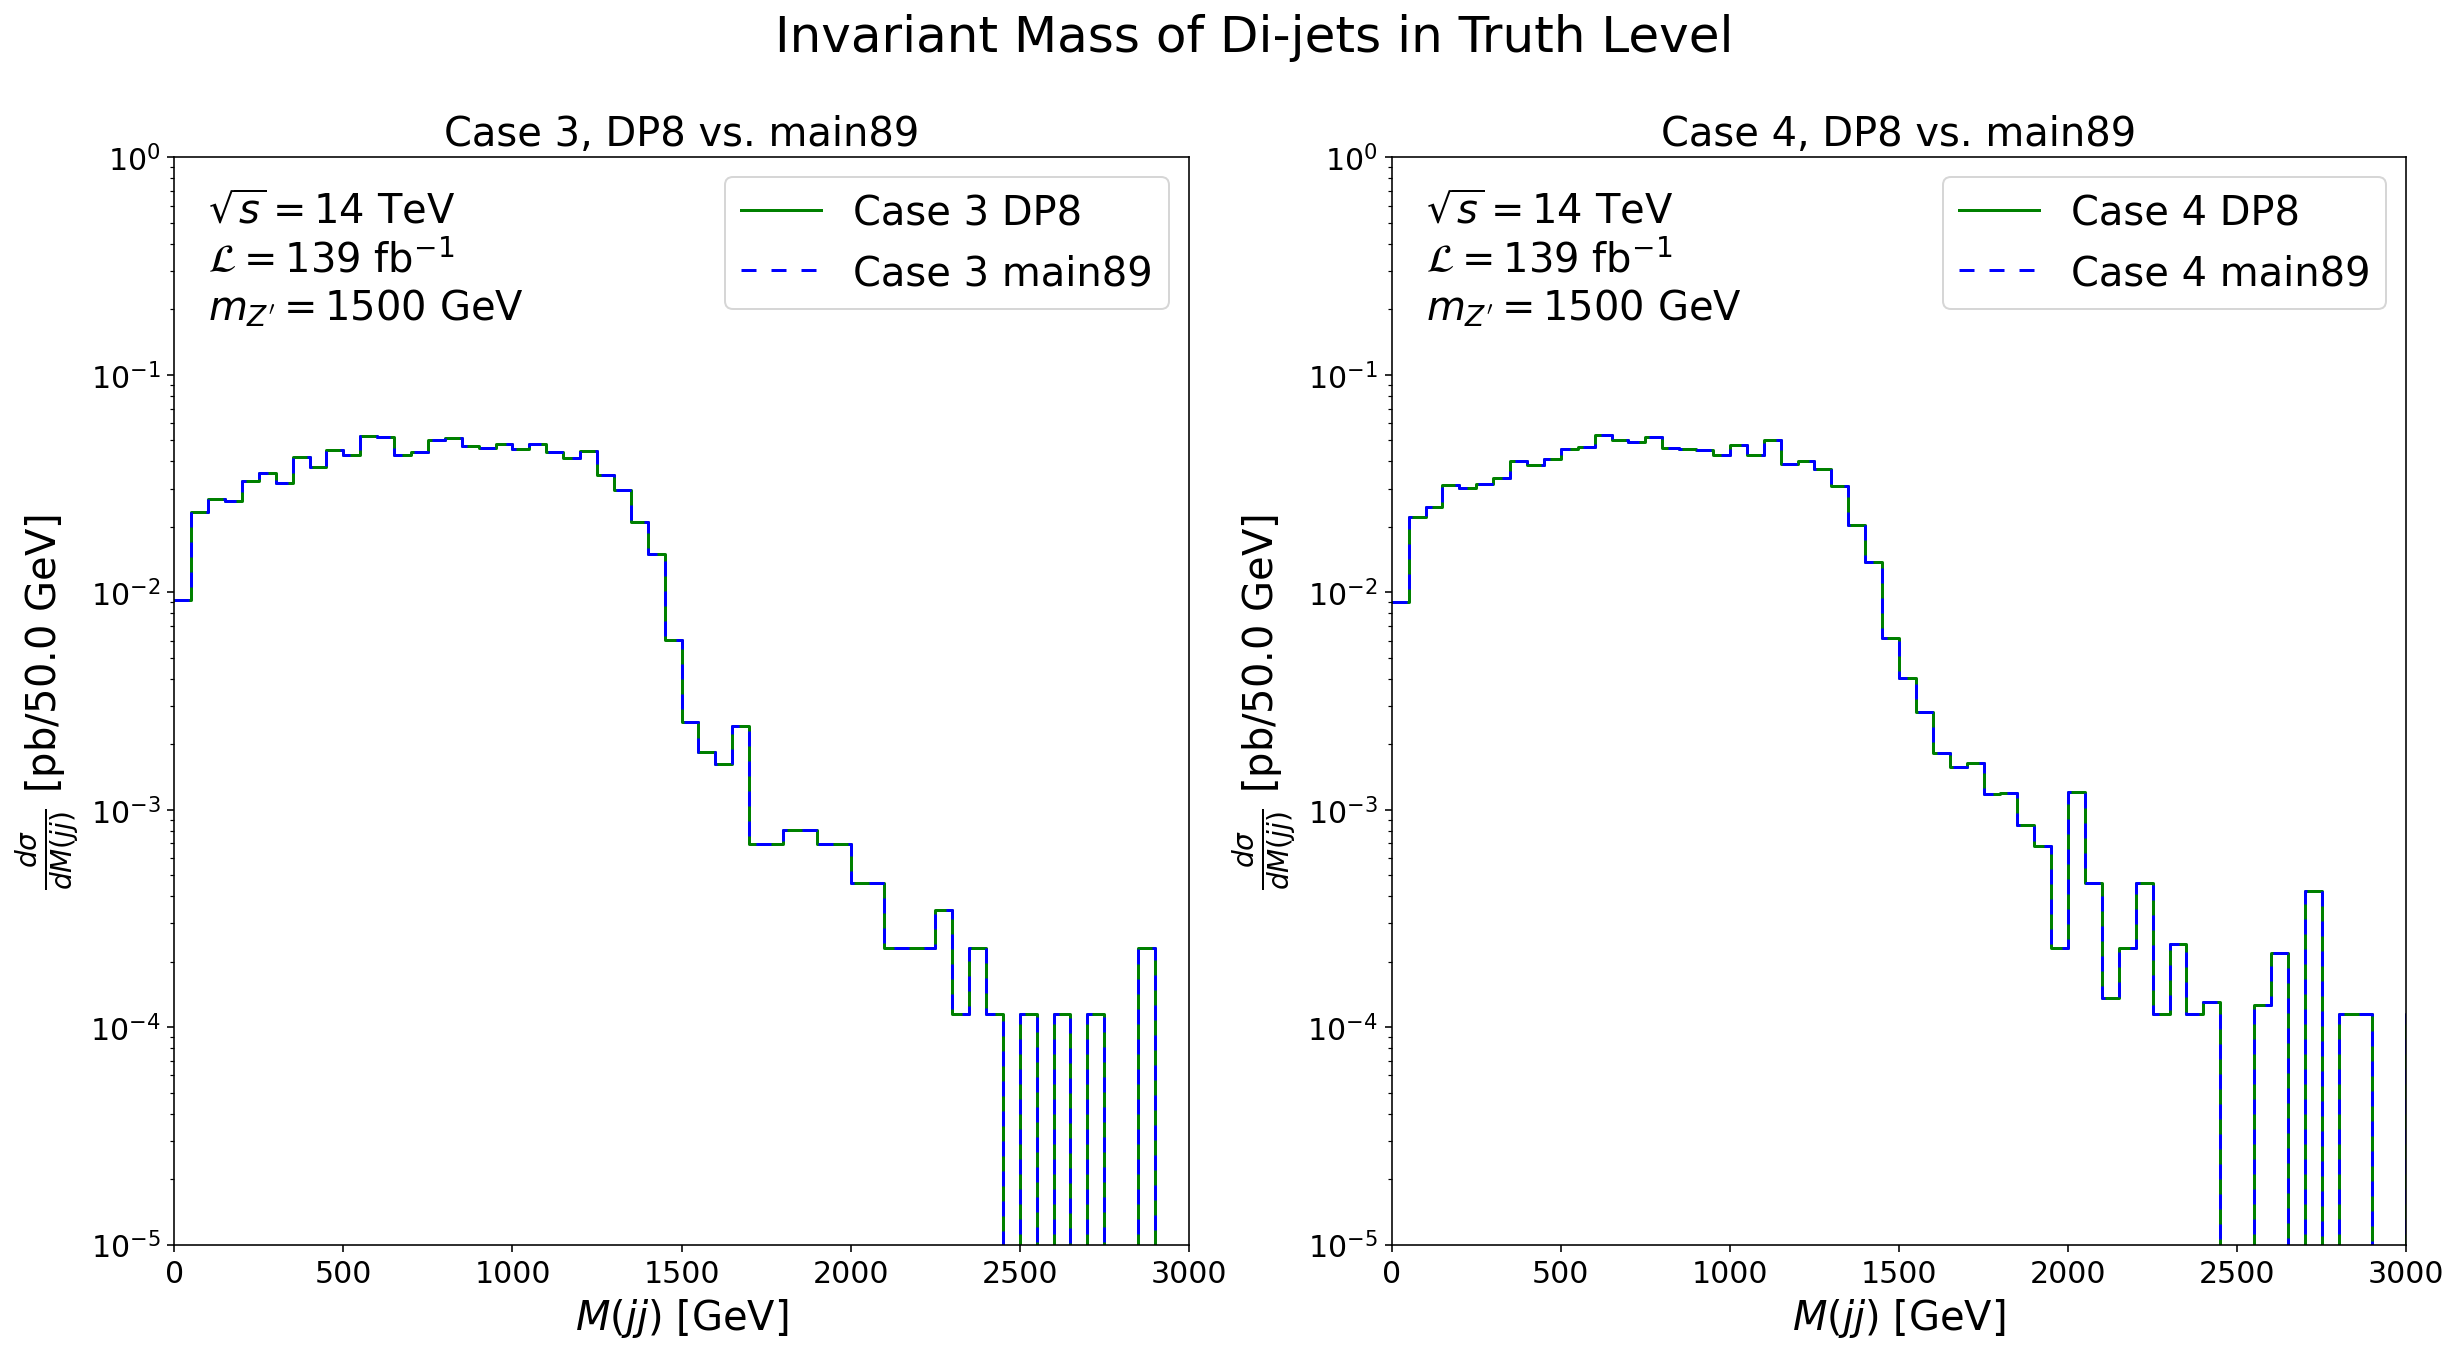

In [25]:
# 1. Figure
fig2_4, axs = plt.subplots(1, 2, figsize=(20,10))
binning = np.linspace(0, 5000, 101)

################################################################################
# 2. Data
hist0_1, bins0_1 = np.histogram(truth_jet_filterDM_83[0], bins=binning, weights=weight_83[s_t_j_fDM_83])
hist0_2, bins0_2 = np.histogram(truth_jet_filterDM_3[0], bins=binning, weights=weight_3[s_t_j_fDM_3])

hist1_1, bins1_1 = np.histogram(truth_jet_filterDM_84[0], bins=binning, weights=weight_84[s_t_j_fDM_84])
hist1_2, bins1_2 = np.histogram(truth_jet_filterDM_4[0], bins=binning, weights=weight_4[s_t_j_fDM_4])

# 3. Plot
axs[0].step(bins0_1[:-1], hist0_1, where='post', color='green', label="Case 3 DP8")
axs[0].step(bins0_2[:-1], hist0_2, where='post',
            color='blue', linestyle=(0, (5, 5)), label="Case 3 main89")

axs[1].step(bins1_1[:-1], hist1_1, where='post', color='green', label="Case 4 DP8")
axs[1].step(bins1_2[:-1], hist1_2, where='post',
            color='blue', linestyle=(0, (5, 5)), label="Case 4 main89")

# 4. axes setting
# title and legend
fig2_4.suptitle("Invariant Mass of Di-jets in Truth Level", fontsize=25)
axs[0].legend(fontsize=20)
axs[1].legend(fontsize=20)
# sub-title and x & y labels
ylabel = "$\\frac{d\sigma}{dM(jj)}$ [pb/"+str(binning[-1]/(len(binning)-1))+" GeV]"
axs[0].set_title("Case 3, DP8 vs. main89", fontsize=20)
axs[0].set_xlabel("$M(jj)$ [GeV]", fontsize=20)
axs[0].set_ylabel(ylabel, fontsize=20)
axs[1].set_title("Case 4, DP8 vs. main89", fontsize=20)
axs[1].set_xlabel("$M(jj)$ [GeV]", fontsize=20)
axs[1].set_ylabel(ylabel, fontsize=20)
# x & y axes limits, scales, and tick
axs[0].set_xlim(0, 3000)
axs[0].set_ylim(1/100000, 1)
axs[0].set_yscale('log')
axs[0].tick_params(axis='both', labelsize=15)
axs[1].set_xlim(0, 3000)
axs[1].set_ylim(1/100000, 1)
axs[1].set_yscale('log')
axs[1].tick_params(axis='both', labelsize=15)

# 5. text
tex1 = "$\sqrt{s} = 14$ TeV"
tex2 = "$\mathcal{L} = $"+str(int(LUMINOSITY/1000))+" $\mathrm{fb}^{-1}$"
tex3 = "$m_{Z^\prime} = 1500$ GeV"
axs[0].text(100, 0.5, tex1, fontsize=20)
axs[0].text(100, 0.3, tex2, fontsize=20)
axs[0].text(100, 0.18, tex3, fontsize=20)
axs[1].text(100, 0.5, tex1, fontsize=20)
axs[1].text(100, 0.3, tex2, fontsize=20)
axs[1].text(100, 0.18, tex3, fontsize=20)

plt.savefig("figures-2/fig2-4_jT_DP8_main89_Mjj.pdf")
plt.show()

#### Conclusion: For Case3 and 4, the DP8 and main89 are the same.

#### 5. $MET$ for DP8 and main89

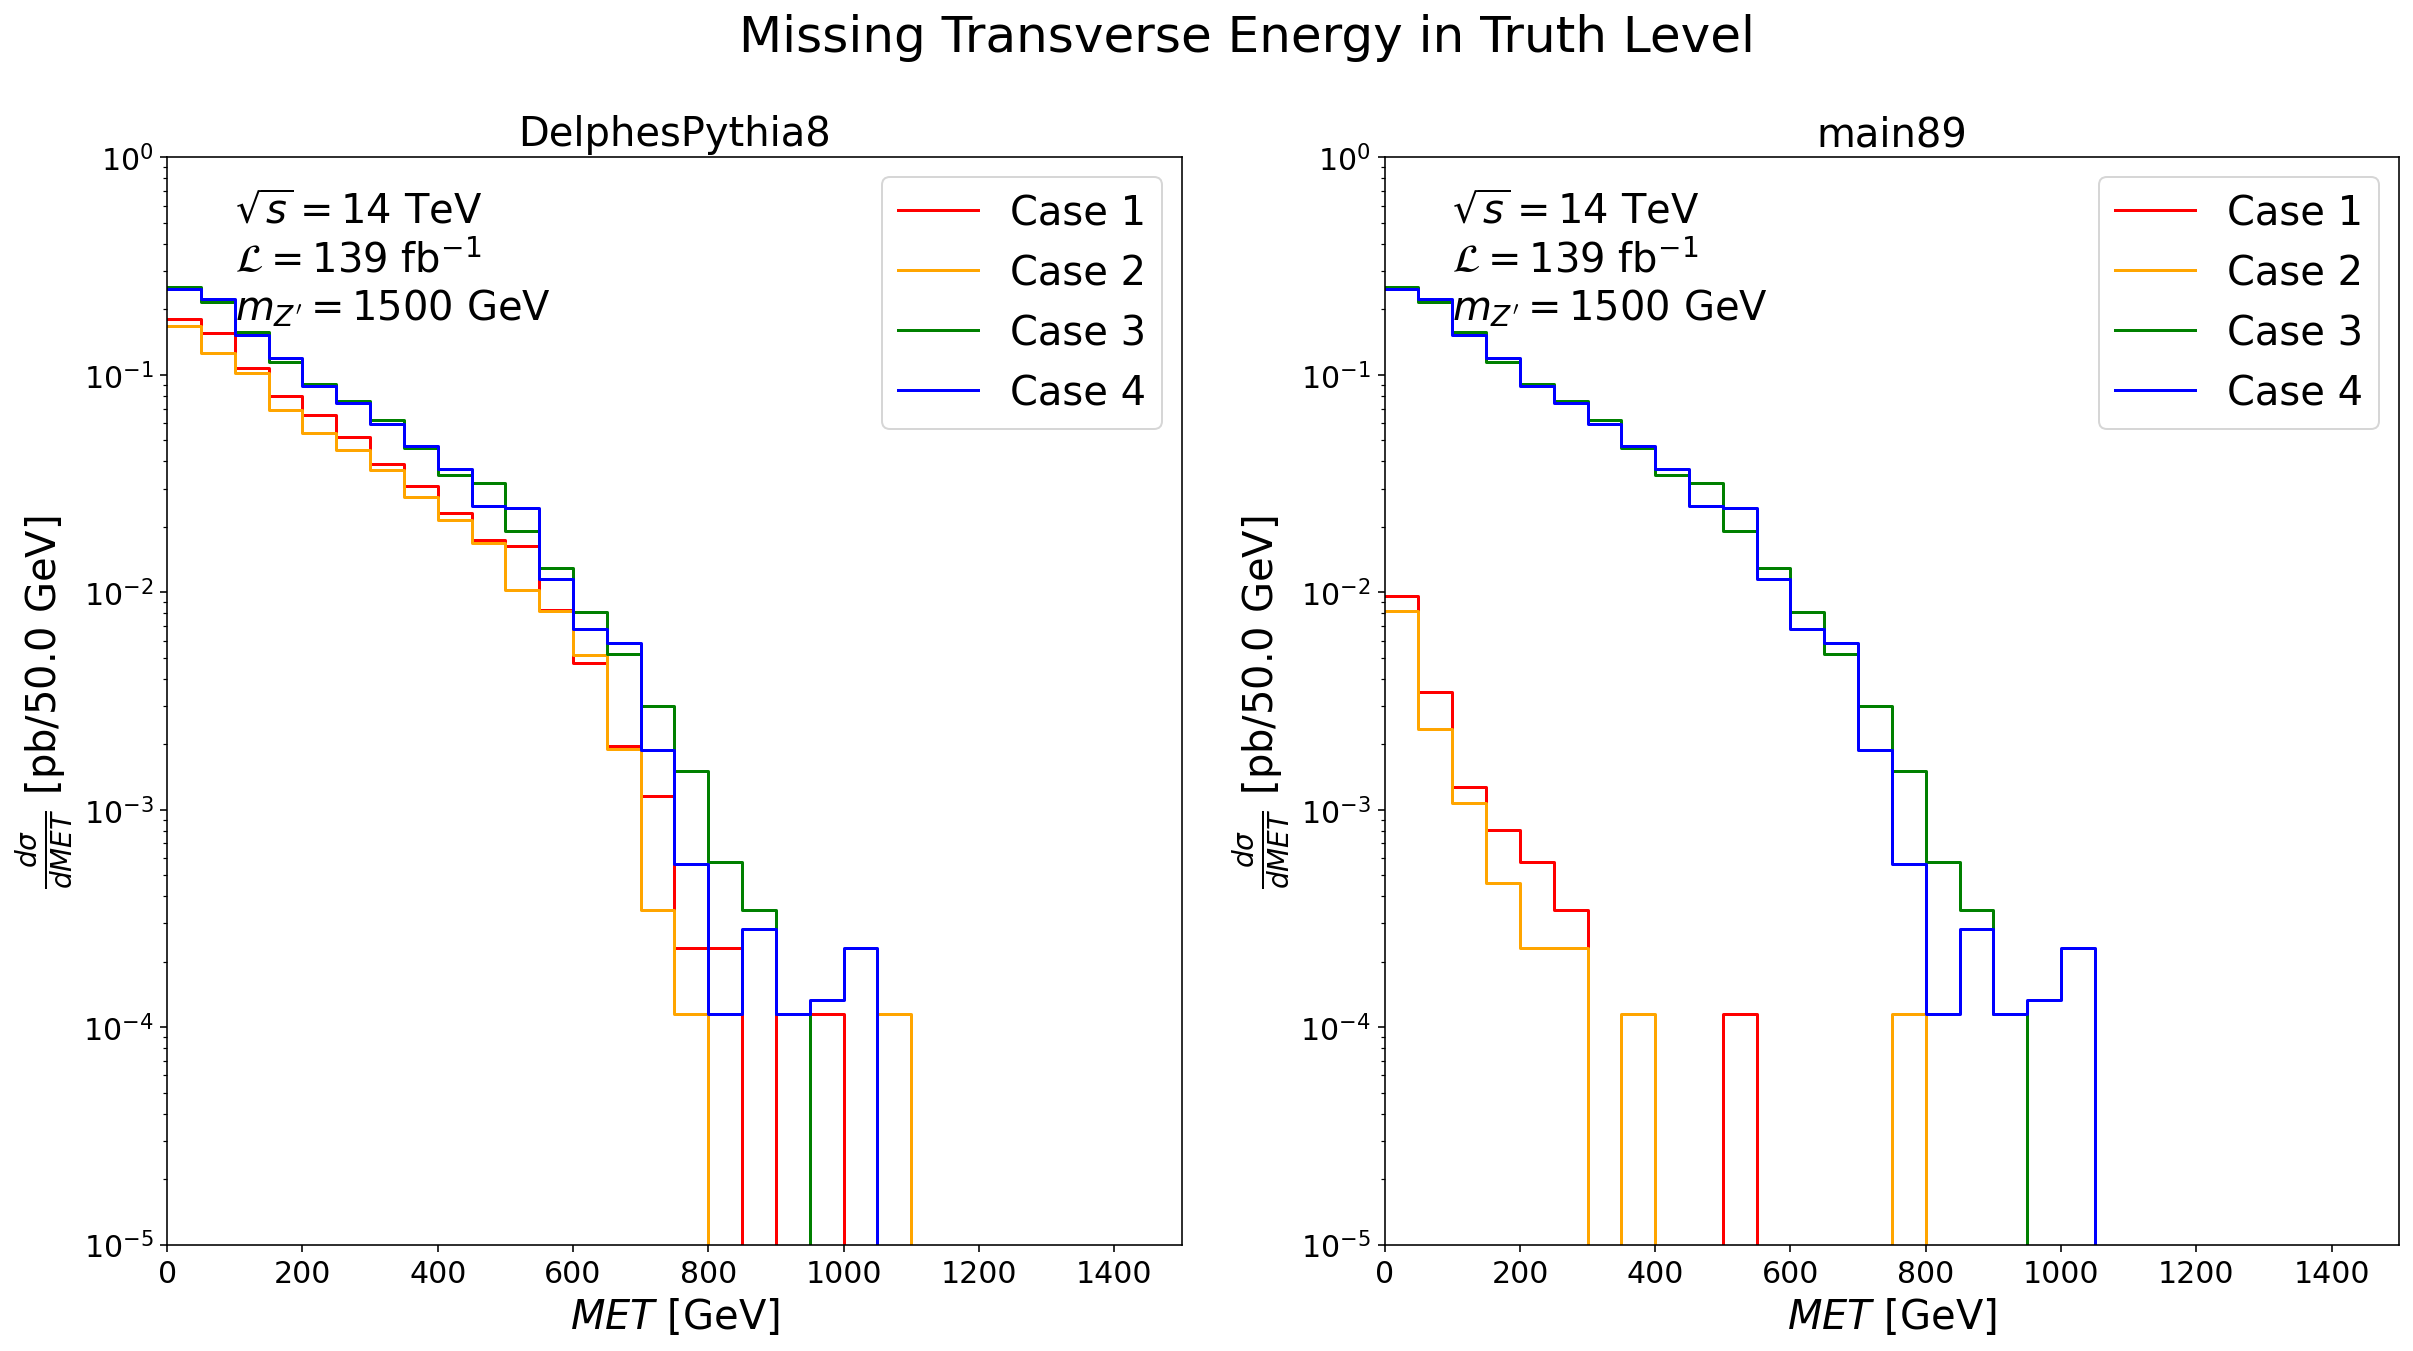

In [26]:
# 1. Figure
fig2_5, axs = plt.subplots(1, 2, figsize=(20,10))
binning = np.linspace(0, 5000, 101)

################################################################################
# 2. Data
hist0_1, bins0_1 = np.histogram(truth_MET_82[0], bins=binning, weights=weight_82[s_t_MET_82])
hist0_2, bins0_2 = np.histogram(truth_MET_88[0], bins=binning, weights=weight_88[s_t_MET_88])
hist0_3, bins0_3 = np.histogram(truth_MET_83[0], bins=binning, weights=weight_83[s_t_MET_83])
hist0_4, bins0_4 = np.histogram(truth_MET_84[0], bins=binning, weights=weight_84[s_t_MET_84])
# hist0_5, bins0_5 = np.histogram(M_xdxdx_23, bins=binning, weights=weight*LUMINOSITY)

hist1_1, bins1_1 = np.histogram(truth_MET_2[0], bins=binning, weights=weight_2[s_t_MET_2])
hist1_2, bins1_2 = np.histogram(truth_MET_8[0], bins=binning, weights=weight_8[s_t_MET_8])
hist1_3, bins1_3 = np.histogram(truth_MET_3[0], bins=binning, weights=weight_3[s_t_MET_3])
hist1_4, bins1_4 = np.histogram(truth_MET_4[0], bins=binning, weights=weight_4[s_t_MET_4])

# 3. Plot
axs[0].step(bins0_1[:-1], hist0_1, where='post', color='red', label="Case 1")
axs[0].step(bins0_2[:-1], hist0_2, where='post', color='orange', label="Case 2")
axs[0].step(bins0_3[:-1], hist0_3, where='post', color='green', label="Case 3")
axs[0].step(bins0_4[:-1], hist0_4, where='post', color='blue', label="Case 4")
# axs[0].step(bins0_5[:-1], hist0_5/np.sum(hist0_5), where='post',
#             color='black', alpha=0.3, label="$M(xd,\\bar{xd})$")

axs[1].step(bins1_1[:-1], hist1_1, where='post', color='red', label="Case 1")
axs[1].step(bins1_2[:-1], hist1_2, where='post', color='orange', label="Case 2")
axs[1].step(bins1_3[:-1], hist1_3, where='post', color='green', label="Case 3")
axs[1].step(bins1_4[:-1], hist1_4, where='post', color='blue', label="Case 4")

# 4. axes setting
# title and legend
fig2_5.suptitle("Missing Transverse Energy in Truth Level", fontsize=25)
axs[0].legend(fontsize=20)
axs[1].legend(fontsize=20)
# sub-title and x & y labels
ylabel = "$\\frac{d\sigma}{dMET}$ [pb/"+str(binning[-1]/(len(binning)-1))+" GeV]"
axs[0].set_title("DelphesPythia8", fontsize=20)
axs[0].set_xlabel("$MET$ [GeV]", fontsize=20)
axs[0].set_ylabel(ylabel, fontsize=20)
axs[1].set_title("main89", fontsize=20)
axs[1].set_xlabel("$MET$ [GeV]", fontsize=20)
axs[1].set_ylabel(ylabel, fontsize=20)
# x & y axes limits, scales, and tick
axs[0].set_xlim(0, 1500)
axs[0].set_ylim(1/100000, 1)
axs[0].set_yscale('log')
axs[0].tick_params(axis='both', labelsize=15)
axs[1].set_xlim(0, 1500)
axs[1].set_ylim(1/100000, 1)
axs[1].set_yscale('log')
axs[1].tick_params(axis='both', labelsize=15)

# 5. text
tex1 = "$\sqrt{s} = 14$ TeV"
tex2 = "$\mathcal{L} = $"+str(int(LUMINOSITY/1000))+" $\mathrm{fb}^{-1}$"
tex3 = "$m_{Z^\prime} = 1500$ GeV"
axs[0].text(100, 0.5, tex1, fontsize=20)
axs[0].text(100, 0.3, tex2, fontsize=20)
axs[0].text(100, 0.18, tex3, fontsize=20)
axs[1].text(100, 0.5, tex1, fontsize=20)
axs[1].text(100, 0.3, tex2, fontsize=20)
axs[1].text(100, 0.18, tex3, fontsize=20)

plt.savefig("figures-2/fig2-5_jT_DP8_main89_MET.pdf")
plt.show()

In [27]:
print("DP8:")
print("Cross-section = {} pb".format(np.sum(hist0_1)[0]))
print("Cross-section = {} pb".format(np.sum(hist0_2)[0]))
print("Cross-section = {} pb".format(np.sum(hist0_3)[0]))
print("Cross-section = {} pb".format(np.sum(hist0_4)[0]))
print('='*39)
print("main89:")
print("Cross-section = {} pb".format(np.sum(hist1_1)[0]))
print("Cross-section = {} pb".format(np.sum(hist1_2)[0]))
print("Cross-section = {} pb".format(np.sum(hist1_3)[0]))
print("Cross-section = {} pb".format(np.sum(hist1_4)[0]))

DP8:
Cross-section = 0.7842158675193787 pb
Cross-section = 0.691679835319519 pb
Cross-section = 1.1329519748687744 pb
Cross-section = 1.1259742975234985 pb
main89:
Cross-section = 0.016168383906028927 pb
Cross-section = 0.012788425659692078 pb
Cross-section = 1.1328262695299656 pb
Cross-section = 1.1259142258591752 pb


#### Conclusion: The cross-sections have no problem.

#### 6. $MET$ for DP8 vs. main89

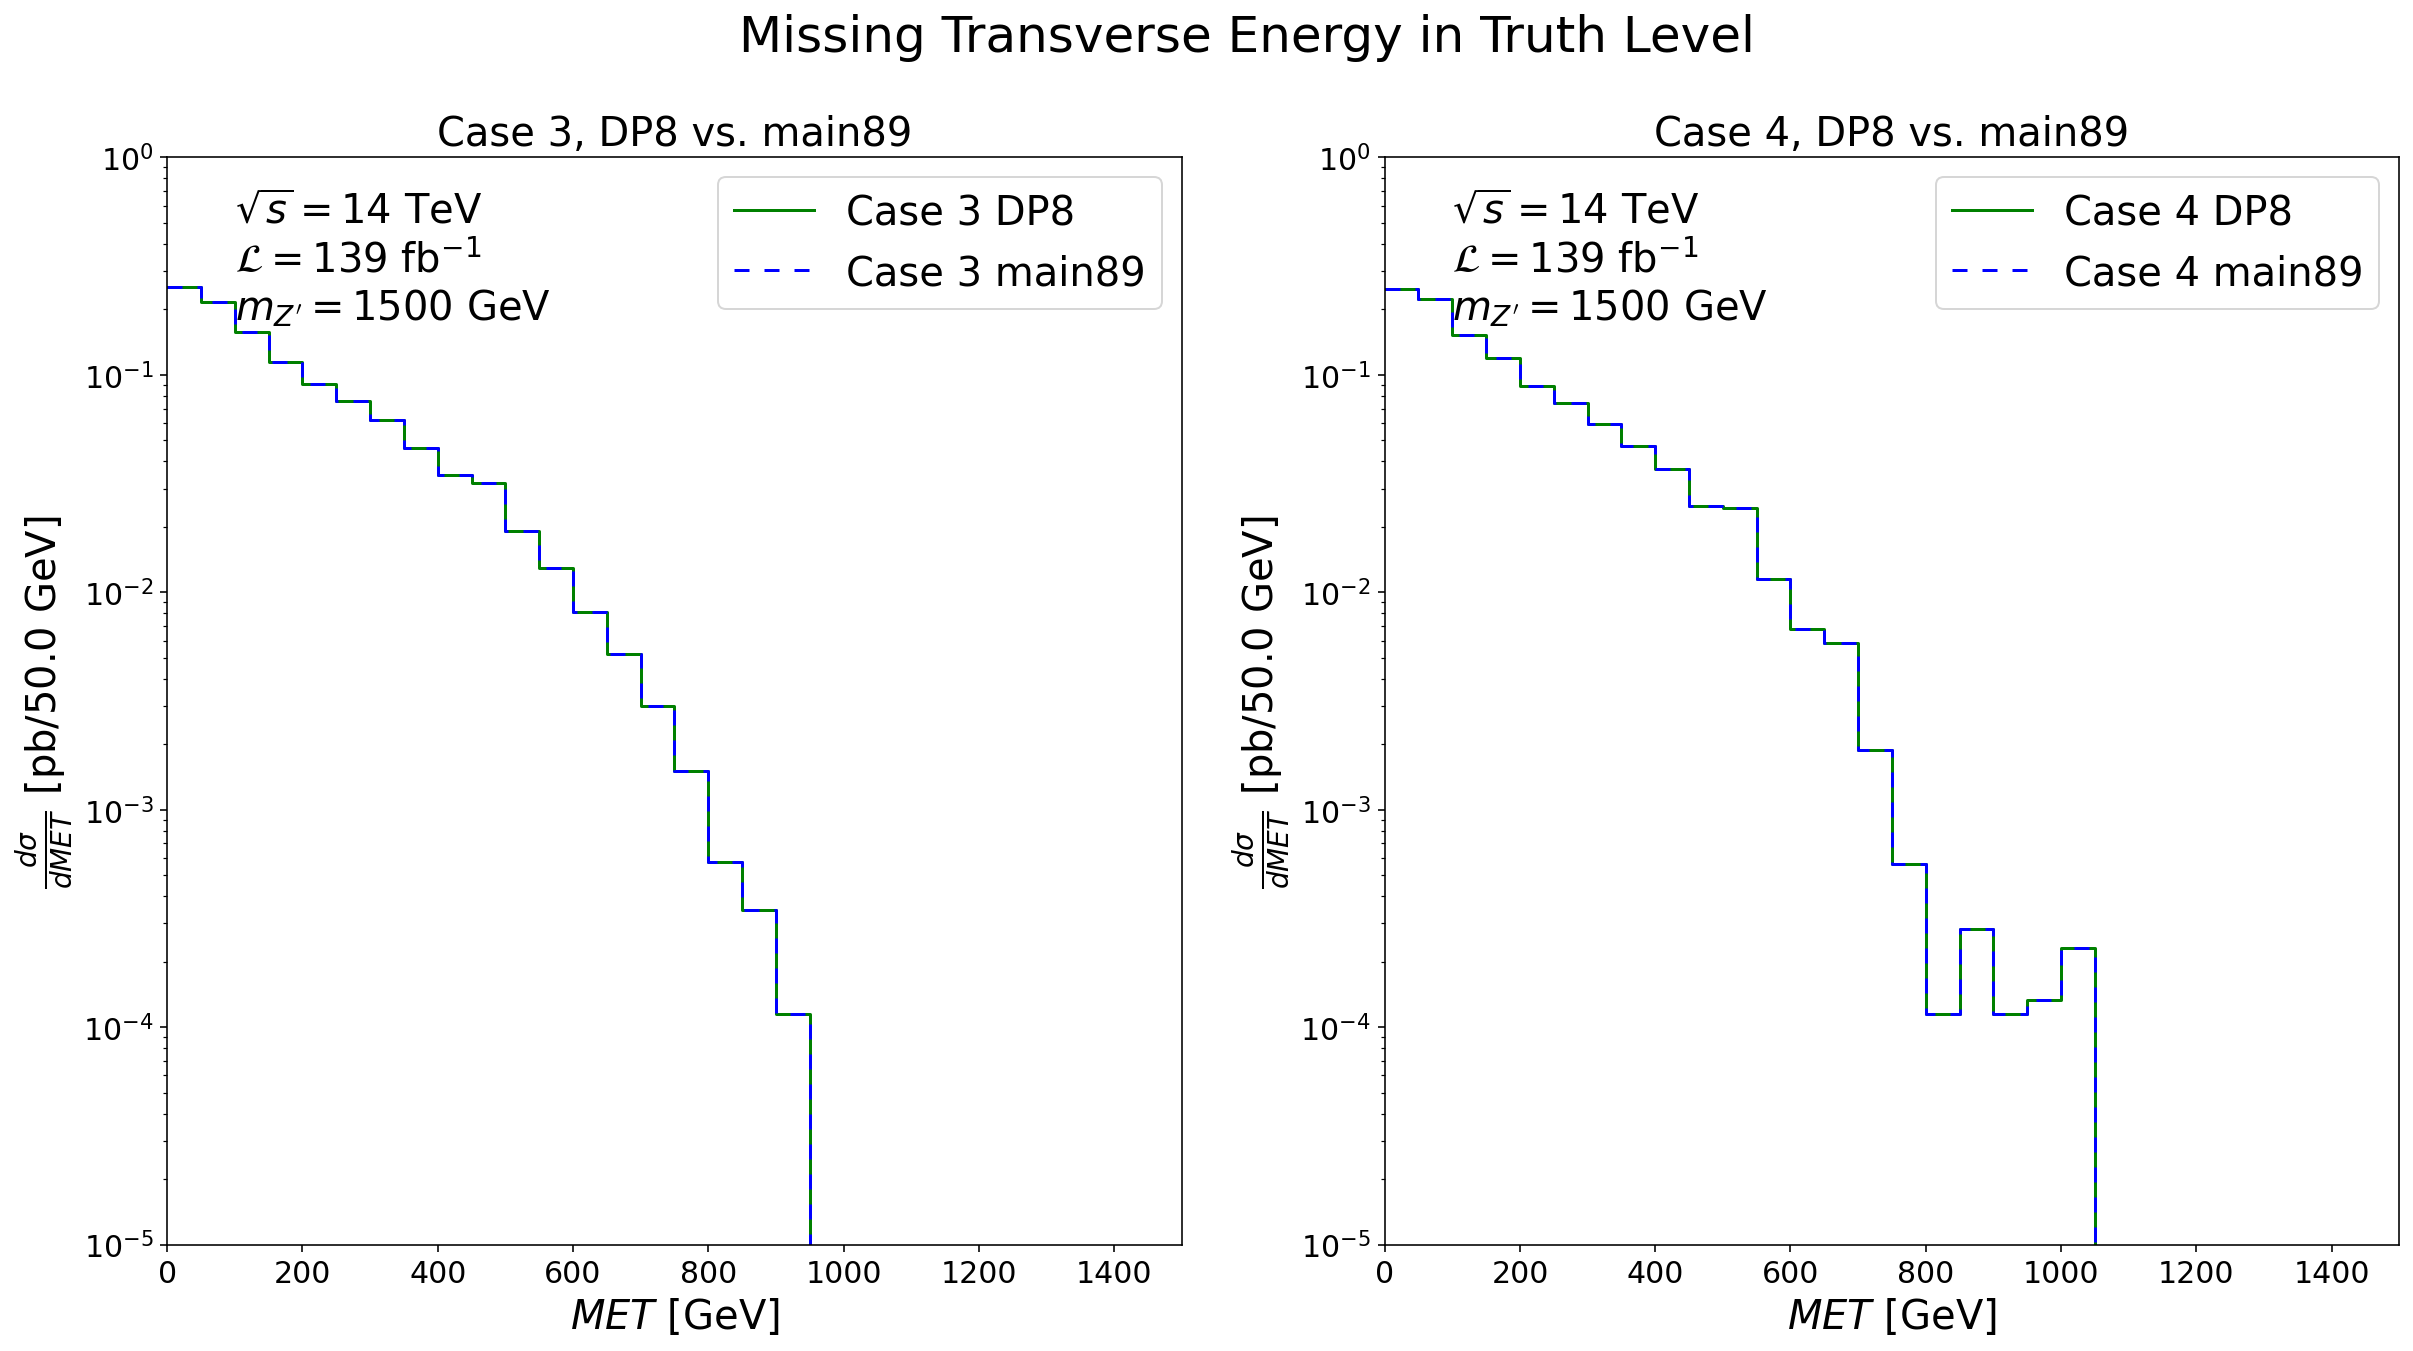

In [28]:
# 1. Figure
fig2_6, axs = plt.subplots(1, 2, figsize=(20,10))
binning = np.linspace(0, 5000, 101)

################################################################################
# 2. Data
hist0_1, bins0_1 = np.histogram(truth_MET_83[0], bins=binning, weights=weight_83[s_t_MET_83])
hist0_2, bins0_2 = np.histogram(truth_MET_3[0], bins=binning, weights=weight_3[s_t_MET_3])

hist1_1, bins1_1 = np.histogram(truth_MET_84[0], bins=binning, weights=weight_84[s_t_MET_84])
hist1_2, bins1_2 = np.histogram(truth_MET_4[0], bins=binning, weights=weight_4[s_t_MET_4])

# 3. Plot
axs[0].step(bins0_1[:-1], hist0_1, where='post', color='green', label="Case 3 DP8")
axs[0].step(bins0_2[:-1], hist0_2, where='post',
            color='blue', linestyle=(0, (5, 5)), label="Case 3 main89")

axs[1].step(bins1_1[:-1], hist1_1, where='post', color='green', label="Case 4 DP8")
axs[1].step(bins1_2[:-1], hist1_2, where='post',
            color='blue', linestyle=(0, (5, 5)), label="Case 4 main89")

# 4. axes setting
# title and legend
fig2_6.suptitle("Missing Transverse Energy in Truth Level", fontsize=25)
axs[0].legend(fontsize=20)
axs[1].legend(fontsize=20)
# sub-title and x & y labels
ylabel = "$\\frac{d\sigma}{dMET}$ [pb/"+str(binning[-1]/(len(binning)-1))+" GeV]"
axs[0].set_title("Case 3, DP8 vs. main89", fontsize=20)
axs[0].set_xlabel("$MET$ [GeV]", fontsize=20)
axs[0].set_ylabel(ylabel, fontsize=20)
axs[1].set_title("Case 4, DP8 vs. main89", fontsize=20)
axs[1].set_xlabel("$MET$ [GeV]", fontsize=20)
axs[1].set_ylabel(ylabel, fontsize=20)
# x & y axes limits, scales, and tick
axs[0].set_xlim(0, 1500)
axs[0].set_ylim(1/100000, 1)
axs[0].set_yscale('log')
axs[0].tick_params(axis='both', labelsize=15)
axs[1].set_xlim(0, 1500)
axs[1].set_ylim(1/100000, 1)
axs[1].set_yscale('log')
axs[1].tick_params(axis='both', labelsize=15)

# 5. text
tex1 = "$\sqrt{s} = 14$ TeV"
tex2 = "$\mathcal{L} = $"+str(int(LUMINOSITY/1000))+" $\mathrm{fb}^{-1}$"
tex3 = "$m_{Z^\prime} = 1500$ GeV"
axs[0].text(100, 0.5, tex1, fontsize=20)
axs[0].text(100, 0.3, tex2, fontsize=20)
axs[0].text(100, 0.18, tex3, fontsize=20)
axs[1].text(100, 0.5, tex1, fontsize=20)
axs[1].text(100, 0.3, tex2, fontsize=20)
axs[1].text(100, 0.18, tex3, fontsize=20)

plt.savefig("figures-2/fig2-6_jT_DP8_main89_MET.pdf")
plt.show()

#### Conclusion: For Case3 and 4, the DP8 and main89 are the same.